# 1. Project Overview

## 1.1 Project Objective
The goal of this project is to perform clustering on a dataset of Premier League players. The data was provided by a website *link*. It covers statistics for 2022/2023 season.

60 players with the highest playtime were chosen for the analysis. All features were normalized by playtime. 
* The big amount of players lets us create distinctively recognizable clusters.
* By choosing only high playtime players and normalization we make sure that we don't group together players who did not have time to crunch numbers with players who just don't takes certain actions.

# 2. Data preparation

In [200]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
current_directory = os.getcwd()
from functools import reduce
print("Current Directory:", current_directory)

# Load the Excel file into pandas dataframes, skipping headers and subheaders

path = './input/PremierLeague2022.xlsx'

column_names_basic = [
    "Name",
    "Nation",
    "Position",
    "Squad",
    "Age",
    "Born",
    "Matches Played",
    "Starts",
    "Minutes Played",
    "90s Played",
    "Goals Scored",
    "Assists",
    "Goals + Assists",
    "Non-Penalty Goals",
    "Penalty Kicks Made",
    "Penalty Kicks Attempted",
    "Yellow Cards",
    "Red Cards",
    "Expected Goals",
    "Non-Penalty Expected Goals",
    "Expected Assisted Goals",
    "Non-Penalty Expected Goals plus Assisted Goals",
    "Progressive Carries",
    "Progressive Passes",
    "Progressive Passes Received",
    "Goals/90",
    "Assists/90",
    "Goals + Assists/90",
    "Non-Penalty Goals/90",
    "Goals plus Assists minus Penalty Kicks made per 90 minutes",
    "Expected Goals per 90 minutes",
    "Expected Assisted Goals per 90 minutes",
    "Expected Goals plus Assisted Goals per 90 minutes",
    "Non-Penalty Expected Goals per 90 minutes",
    "Non-Penalty Expected Goals plus Assisted Goals per 90 minutes",
    "Matches"
]

column_names_passing = [
    "Name",
    "Nation",
    "Position",
    "Squad",
    "Age",
    "Born",
    "90s Played",
    "Passes Completed",
    "Passes Attempted",
    "Pass Completion Percentage",
    "Total Passing Distance",
    "Progressive Passing Distance",
    "Short Passes Completed",
    "Short Passes Attempted",
    "Short Pass Completion Percentage",
    "Medium Passes Completed",
    "Medium Passes Attempted",
    "Medium Pass Completion Percentage",
    "Long Passes Completed",
    "Long Passes Attempted",
    "Long Pass Completion Percentage",
    "Assists",
    "Expected Assisted Goals",
    "Expected Goals Assisted per Pass",
    "Assists minus Expected Goals Assisted",
    "Key Passes",
    "Passes into Final Third",
    "Passes into Penalty Area",
    "Crosses into Penalty Area",
    "Progressive Passes",
    "Matches"
]

column_names_shooting = [
    "Name",
    "Nation",
    "Position",
    "Squad",
    "Age",
    "Born",
    "90s Played",
    "Goals",
    "Total Shots",
    "Shots on Target",
    "Shots on Target Percentage",
    "Shots per 90 minutes",
    "Shots on Target per 90 minutes",
    "Goals per Shot",
    "Goals per Shot on Target",
    "Average Shot Distance",
    "Shots from Free Kicks",
    "Penalty Kicks Made",
    "Penalty Kicks Attempted",
    "Expected Goals",
    "Non-Penalty Expected Goals",
    "Non-Penalty Expected Goals per Shot",
    "Goals minus Expected Goals",
    "Non-Penalty Goals minus Non-Penalty Expected Goals",
    "Matches"
]

column_names_possession = [
    "Name",
    "Nation",
    "Position",
    "Squad",
    "Age",
    "Born",
    "90s Played",
    "Touches",
    "Defensive Penalty Area Touches",
    "Defensive 1/3 Touches",
    "Middle 1/3 Touches",
    "Attacking 1/3 Touches",
    "Attacking Penalty Area Touches",
    "Live-Ball Touches",
    "Take-Ons Attempted",
    "Successful Take-Ons",
    "Successful Take-On Percentage",
    "Times Tackled During Take-On",
    "Tackled During Take-On Percentage",
    "Carries",
    "Total Carrying Distance",
    "Progressive Carrying Distance",
    "Progressive Carries",
    "Carries into Final Third",
    "Carries into Penalty Area",
    "Miscontrols",
    "Dispossessed",
    "Passes Received",
    "Progressive Passes Received",
    "Matches"
]

column_names_defense = [
    "Name",
    "Nation",
    "Position",
    "Squad",
    "Age",
    "Born",
    "90s Played",                 
    "Tackles",                         # Tkl -- Tackles
    "Tackles Won",                     # TklW -- Tackles Won
    "Tackles (Def 3rd)",               # Def 3rd -- Tackles in defensive 1/3
    "Tackles (Mid 3rd)",               # Mid 3rd -- Tackles in middle 1/3
    "Tackles (Att 3rd)",               # Att 3rd -- Tackles in attacking 1/3
    "Dribblers Tackled",               # Tkl -- Dribblers Tackled
    "Dribbles Challenged",             # Att -- Dribbles Challenged
    "% of Dribblers Tackled",          # Tkl% -- Percentage of Dribblers Tackled
    "Challenges Lost",                 # Lost -- Challenges Lost
    "Blocks",                          # Blocks
    "Shots Blocked",                   # Sh -- Shots Blocked
    "Passes Blocked",                  # Pass -- Passes Blocked
    "Interceptions",                   # Int -- Interceptions
    "Number of players tackled plus number of interceptions",  # Tkl+Int -- Tkl+Int
    "Clearances",                      # Clr -- Clearances
    "Errors",                  # Err -- Errors (Mistakes leading to an opponent's shot)
    "Matches"
]

column_names_goalkeeping = [
    "Name",
    "Nation",
    "Position",
    "Squad",
    "Age",
    "Born",
    "90s Played",
    "Goals Against",
    "Penalty Kicks Allowed",
    "Free Kick Goals Against",
    "Corner Kick Goals Against",
    "Own Goals Scored Against Goalkeeper",
    "Post-Shot Expected Goals",
    "Post-Shot Expected Goals per Shot on Target",
    "Post-Shot Expected Goals minus Goals Allowed",
    "Post-Shot Expected Goals minus Goals Allowed per 90 minutes",
    "Passes Completed (Launched)",
    "Passes Attempted (Launched)",
    "Pass Completion Percentage (Launched)",
    "Passes Attempted (GK)",
    "Throws Attempted",
    "Launch Percentage",
    "Average Pass Length",
    "Goal Kicks Attempted",
    "Launch Percentage (Goal Kicks)",
    "Average Length of Goal Kicks",
    "Crosses Faced",
    "Crosses Stopped",
    "Crosses Stopped Percentage",
    "Defensive Actions Outside Penalty Area",
    "Defensive Actions Outside Penalty Area per 90 minutes",
    "Average Distance of Defensive Actions",
    "Matches"
]


basic = pd.read_excel(path, sheet_name='Basic', names=column_names_basic, skiprows=1)
possession = pd.read_excel(path, sheet_name='Possession', names=column_names_possession, skiprows=1)
shooting = pd.read_excel(path, sheet_name='Shooting', names=column_names_shooting, skiprows=1)
passing = pd.read_excel(path, sheet_name='Passing', names=column_names_passing, skiprows=1)
defence = pd.read_excel(path, sheet_name='Defending', names=column_names_defense, skiprows=1)
goalkeeping = pd.read_excel(path, sheet_name='Goalkeeping', names=column_names_goalkeeping, skiprows=1)

data = [basic, passing, shooting, possession, defence, goalkeeping]

for df in data:
    # Drop the columns that are not needed
    df.drop(['Matches'], axis=1, inplace=True)
    
    # Drop the rows that are not needed
    df.drop_duplicates(subset=['Name', 'Nation', 'Age', 'Born', 'Squad', 'Position'], inplace=True)
    df.drop(df[df['Name'] == 'Player'].index, inplace=True)

df = reduce(lambda left,right: pd.merge(left,right,on=['Name', 'Nation', 'Position', 'Squad', 'Age', 'Born', '90s Played'], how='outer'), data)
# df = df.merge(goalkeeping, on=['Name', 'Nation', 'Position', 'Squad', 'Age', 'Born', '90s Played', 'Matches'], how='outer')
df.head(5)

Current Directory: /home/kacper/Documents/wad2


Name   Nation Position         Squad Age  Born Matches Played  \
0  Brenden Aaronson   us USA    MF,FW  Leeds United  21  2000             36   
1     George Abbott  eng ENG       MF     Tottenham  16  2005              1   
2         Che Adams  sct SCO       FW   Southampton  26  1996             28   
3       Tyler Adams   us USA       MF  Leeds United  23  1999             24   
4  Tosin Adarabioyo  eng ENG       DF        Fulham  24  1997             25   

  Starts Minutes Played 90s Played  ... Average Pass Length  \
0     28           2372       26.4  ...                 NaN   
1      0              1          0  ...                 NaN   
2     23           1992       22.1  ...                 NaN   
3     24           2156         24  ...                 NaN   
4     23           2085       23.2  ...                 NaN   

  Goal Kicks Attempted Launch Percentage (Goal Kicks)  \
0                  NaN                            NaN   
1                  NaN                            NaN   
2                  NaN                            NaN   
3                  NaN                            NaN   
4                  NaN                            NaN   

  Average Length of Goal Kicks Crosses Faced Crosses Stopped  \
0                          NaN           NaN             NaN   
1                          NaN           NaN             NaN   
2                          NaN           NaN             NaN   
3                          NaN           NaN             NaN   
4                          NaN           NaN             NaN   

  Crosses Stopped Percentage Defensive Actions Outside Penalty Area  \
0                        NaN                                    NaN   
1                        NaN                                    NaN   
2                        NaN                                    NaN   
3                        NaN                                    NaN   
4                        NaN                                    NaN   

  Defensive Actions Outside Penalty Area per 90 minutes  \
0                                                NaN      
1                                                NaN      
2                                                NaN      
3                                                NaN      
4                                                NaN      

  Average Distance of Defensive Actions  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4                                   NaN  

[5 rows x 138 columns]

In [201]:
# Drop the duplicate columns that are not needed
df.drop(df.filter(like='_y').columns, axis=1, inplace=True)
df.rename(columns=lambda x: x.replace('_x', ''), inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Show all columns names and df shape
print(df.shape)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.columns.values)

(569, 129)
['Name' 'Nation' 'Position' 'Squad' 'Age' 'Born' 'Matches Played' 'Starts'
 'Minutes Played' '90s Played' 'Goals Scored' 'Assists' 'Goals + Assists'
 'Non-Penalty Goals' 'Penalty Kicks Made' 'Penalty Kicks Attempted'
 'Yellow Cards' 'Red Cards' 'Expected Goals' 'Non-Penalty Expected Goals'
 'Expected Assisted Goals'
 'Non-Penalty Expected Goals plus Assisted Goals' 'Progressive Carries'
 'Progressive Passes' 'Progressive Passes Received' 'Goals/90'
 'Assists/90' 'Goals + Assists/90' 'Non-Penalty Goals/90'
 'Goals plus Assists minus Penalty Kicks made per 90 minutes'
 'Expected Goals per 90 minutes' 'Expected Assisted Goals per 90 minutes'
 'Expected Goals plus Assisted Goals per 90 minutes'
 'Non-Penalty Expected Goals per 90 minutes'
 'Non-Penalty Expected Goals plus Assisted Goals per 90 minutes'
 'Passes Completed' 'Passes Attempted' 'Pass Completion Percentage'
 'Total Passing Distance' 'Progressive Passing Distance'
 'Short Passes Completed' 'Short Passes Attempted'
 'S

In [202]:
# Inspect Column Datatypes
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

Name                                                             object
Nation                                                           object
Position                                                         object
Squad                                                            object
Age                                                              object
Born                                                             object
Matches Played                                                   object
Starts                                                           object
Minutes Played                                                   object
90s Played                                                       object
Goals Scored                                                     object
Assists                                                          object
Goals + Assists                                                  object
Non-Penalty Goals                                               

In [203]:
# List of text columns
text_columns = ['Name', 'Nation', 'Position', 'Squad']

# Convert all non text columns to numeric
df[df.columns.difference(text_columns)] = df[df.columns.difference(text_columns)].apply(pd.to_numeric)

# Inspect Column Datatypes
print(df.dtypes)

Name                                                      object
Nation                                                    object
Position                                                  object
Squad                                                     object
Age                                                        int64
                                                          ...   
Crosses Stopped                                          float64
Crosses Stopped Percentage                               float64
Defensive Actions Outside Penalty Area                   float64
Defensive Actions Outside Penalty Area per 90 minutes    float64
Average Distance of Defensive Actions                    float64
Length: 129, dtype: object


In [204]:
# Select the top 60 players by minutes played
df = df.nlargest(120, 'Minutes Played')

# Inspect the data
df.head(60)

Name   Nation Position            Squad  Age  Born  \
192            David de Gea   es ESP       GK   Manchester Utd   31  1990   
420          Aaron Ramsdale  eng ENG       GK          Arsenal   24  1998   
423              David Raya   es ESP       GK        Brentford   26  1995   
505         James Tarkowski  eng ENG       DF          Everton   29  1992   
143      Gabriel Dos Santos   br BRA       DF          Arsenal   24  1997   
265              Harry Kane  eng ENG       FW        Tottenham   29  1993   
242              Alex Iwobi   ng NGA    MF,FW          Everton   26  1996   
540       James Ward-Prowse  eng ENG       MF      Southampton   27  1994   
520         Kieran Trippier  eng ENG       DF    Newcastle Utd   31  1990   
15                  Alisson   br BRA       GK        Liverpool   29  1992   
412         Jordan Pickford  eng ENG       GK          Everton   28  1994   
213              Marc Guéhi  eng ENG       DF   Crystal Palace   22  2000   
278              Ezri Konsa  eng ENG       DF      Aston Villa   24  1997   
172         Bruno Fernandes   pt POR    MF,FW   Manchester Utd   27  1994   
273              Max Kilman  eng ENG       DF           Wolves   25  1997   
452           Mohamed Salah   eg EGY       FW        Liverpool   30  1992   
428             Declan Rice  eng ENG       MF         West Ham   23  1999   
343                 Ben Mee  eng ENG       DF        Brentford   32  1989   
415               Nick Pope  eng ENG       GK    Newcastle Utd   30  1992   
87         Timothy Castagne   be BEL       DF   Leicester City   26  1995   
296         Jefferson Lerma   co COL       MF      Bournemouth   27  1994   
295              Bernd Leno   de GER       GK           Fulham   30  1992   
448                 José Sá   pt POR       GK           Wolves   29  1993   
151              Lewis Dunk  eng ENG       DF         Brighton   30  1991   
210             Pascal Groß   de GER    MF,DF         Brighton   31  1991   
227              Rico Henry  eng ENG       DF        Brentford   25  1997   
65             Jarrod Bowen  eng ENG    FW,MF         West Ham   25  1996   
466            Fabian Schär   ch SUI       DF    Newcastle Utd   30  1991   
451             Bukayo Saka  eng ENG       FW          Arsenal   20  2001   
276              Robin Koch   de GER       DF     Leeds United   26  1996   
154                 Ederson   br BRA       GK  Manchester City   28  1993   
353            Tyrone Mings  eng ENG       DF      Aston Villa   29  1993   
75           Moisés Caicedo   ec ECU       MF         Brighton   20  2001   
328       Emiliano Martínez   ar ARG       GK      Aston Villa   29  1992   
236         Pierre Højbjerg   dk DEN       MF        Tottenham   26  1995   
64              Sven Botman   nl NED       DF    Newcastle Utd   22  2000   
541           Ollie Watkins  eng ENG       FW      Aston Villa   26  1995   
568         Martin Ødegaard   no NOR       MF          Arsenal   23  1998   
73                 Dan Burn  eng ENG       DF    Newcastle Utd   30  1992   
166        Łukasz Fabiański   pl POL       GK         West Ham   37  1985   
395           João Palhinha   pt POR       MF           Fulham   27  1995   
434        Antonee Robinson   us USA       DF           Fulham   24  1997   
347           Illan Meslier   fr FRA       GK     Leeds United   22  2000   
545               Ben White  eng ENG       DF          Arsenal   24  1997   
373             Rúben Neves   pt POR       MF           Wolves   25  1997   
558            Granit Xhaka   ch SUI       MF          Arsenal   29  1992   
196      Morgan Gibbs-White  eng ENG    MF,FW  Nott'ham Forest   22  2000   
515              Ivan Toney  eng ENG       FW        Brentford   26  1996   
480              Adam Smith  eng ENG       DF      Bournemouth   31  1991   
253         Brennan Johnson  wls WAL    FW,MF  Nott'ham Forest   21  2001   
309            Douglas Luiz   br BRA       MF      Aston Villa   24  1998   
14   Trent Alexande

In [205]:
# Count NaN values in each column
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())

Name                                                               0
Nation                                                             0
Position                                                           0
Squad                                                              0
Age                                                                0
Born                                                               0
Matches Played                                                     0
Starts                                                             0
Minutes Played                                                     0
90s Played                                                         0
Goals Scored                                                       0
Assists                                                            0
Goals + Assists                                                    0
Non-Penalty Goals                                                  0
Penalty Kicks Made                

## 3. Feature Selection
 

*Features for group creation*
* Defensive Penalty Area Touches 
* Defensive 1/3 Touches
* Middle 1/3 Touches
* Attacking 1/3 Touches 
* Shots
* Goals
* Assists
* Carries into Final Third
* Carries into Penalty Area
* Successful Take-Ons
* Passes Completed
* Short Passes Completed
* Medium Passes Completed
* Long Passes Completed
* Yellow Cards
* Red Cards
* Tackles
* Blocks
* Interceptions
* Crosses Faced
* Throws Attempted

All stats per 90 minutes played.

*Features for group comparasion*
* Position (s)
* Squad (s)
* Total Passing Distance  
* Average Shot Distance
* Progressive Carrying Distance
* Clearances 

In [206]:
# Text features will not be included as features
text_columns = ['Name', 'Nation', 'Position', 'Squad']

grouping_columns = [
    'Defensive Penalty Area Touches', 
    'Defensive 1/3 Touches', 
    'Middle 1/3 Touches', 
    'Attacking 1/3 Touches', 
    'Total Shots', 
    'Goals', 
    'Assists', 
    'Carries into Final Third', 
    'Carries into Penalty Area', 
    'Successful Take-Ons', 
    'Passes Completed', 
    'Short Passes Completed', 
    'Medium Passes Completed', 
    'Long Passes Completed', 
    'Yellow Cards', 
    'Red Cards', 
    'Tackles', 
    'Blocks', 
    'Interceptions', 
    'Crosses Faced',
    'Throws Attempted'
]

comparing_columns = [
    'Position',
    'Squad',
    'Total Passing Distance',
    'Average Shot Distance',
    'Progressive Carrying Distance',
    'Clearances'
]

# Prepare Finale Data Frames
df.set_index('Name', inplace=True)
df_grouping = df[grouping_columns]
df_comparing = df[comparing_columns]

# fill NaN values with 0
df_grouping.fillna(0, inplace=True)
df_comparing.fillna(0, inplace=True)

# Normalize the data by player minutes played
df_grouping = df_grouping.div(df['Minutes Played'], axis=0)
df_comparing[['Total Passing Distance', 'Average Shot Distance', 'Progressive Carrying Distance', 'Clearances']] = df_comparing[['Total Passing Distance', 'Average Shot Distance', 'Progressive Carrying Distance', 'Clearances']].div(df['Minutes Played'], axis=0)

print(df_grouping.head(5))
print(df_comparing.head(5))

                    Defensive Penalty Area Touches  Defensive 1/3 Touches  \
Name                                                                        
David de Gea                              0.326316               0.379240   
Aaron Ramsdale                            0.254971               0.342105   
David Raya                                0.367544               0.472515   
James Tarkowski                           0.107895               0.318713   
Gabriel Dos Santos                        0.090056               0.338222   

                    Middle 1/3 Touches  Attacking 1/3 Touches  Total Shots  \
Name                                                                         
David de Gea                  0.001462               0.000000     0.000000   
Aaron Ramsdale                0.008187               0.000000     0.000000   
David Raya                    0.031579               0.000292     0.000292   
James Tarkowski               0.270760               0.033041     0.00

/tmp/ipykernel_37784/1264766581.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouping.fillna(0, inplace=True)
/tmp/ipykernel_37784/1264766581.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparing.fillna(0, inplace=True)
/tmp/ipykernel_37784/1264766581.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparing[['Total Passing Distance', 'Average Shot 

In [207]:
# Standardize the data
scaler = StandardScaler()
df_grouping_normalized = scaler.fit_transform(df_grouping)

# Clustering 

## Algorithms

#### K-MEANS
K-Means is a popular clustering algorithm used in unsupervised machine learning. The main objective of K-Means is to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean. The algorithm iteratively refines its clusters to minimize the sum of squared distances between data points and their assigned cluster centers.

Here's a step-by-step overview of the K-Means algorithm:

1. **Initialization:** Randomly select K initial cluster centroids. These centroids can be either randomly chosen data points or based on some heuristic.

2. **Assignment:** Assign each data point to the cluster whose centroid is the nearest, typically using Euclidean distance. The data points are then grouped into K clusters.

3. **Update Centroids:** Recalculate the centroid of each cluster by taking the mean of all data points assigned to that cluster.

4. **Repeat:** Repeat steps 2 and 3 until convergence. Convergence occurs when the assignments of data points to clusters no longer change or change very little.

The algorithm aims to minimize the within-cluster sum of squares, making clusters more compact and data points within a cluster more similar to each other.

It's important to note a few considerations about K-Means:

- The algorithm is sensitive to the initial placement of centroids, and different initializations can lead to different final results. This is often addressed by running the algorithm multiple times with different initializations.

- The choice of K, the number of clusters, is a critical parameter and can impact the quality of the clustering. Various methods, such as the elbow method or silhouette analysis, can be used to determine an optimal value for K.

- K-Means assumes that clusters are spherical and equally sized, which may not hold in all cases.

K-Means is computationally efficient and widely used for various applications, including customer segmentation, image compression, and pattern recognition.


#### Agglomerative Hierarchical Clustering
Agglomerative Hierarchical Clustering is a type of hierarchical clustering algorithm used in unsupervised machine learning. The key idea behind hierarchical clustering is to build a hierarchy of clusters, where clusters at one level are formed by merging clusters at the previous level. Agglomerative Hierarchical Clustering starts with individual data points as separate clusters and then progressively merges them until a single cluster encompasses all the data.

Here's a step-by-step overview of the Agglomerative Hierarchical Clustering process:

1. **Initialization:** Treat each data point as a singleton cluster, resulting in N clusters for N data points.

2. **Calculate Pairwise Distances:** Compute the distance or dissimilarity between each pair of clusters. Common distance measures include Euclidean distance, Manhattan distance, or others depending on the nature of the data.

3. **Merge Closest Clusters:** Identify the two clusters with the smallest distance between them and merge them into a new cluster. The distance between newly formed clusters is typically determined by different linkage methods such as single linkage, complete linkage, or average linkage.

4. **Update Distance Matrix:** Recalculate distances between the new cluster and the remaining clusters based on the chosen linkage method.

5. **Repeat:** Repeat steps 3 and 4 until only a single cluster remains, representing the entire dataset.

6. **Dendrogram:** Throughout the process, a dendrogram (tree diagram) is often constructed, illustrating the hierarchy of cluster relationships. The height at which clusters are merged in the dendrogram indicates the dissimilarity at which clusters are combined.

One of the advantages of Agglomerative Hierarchical Clustering is its ability to visualize the hierarchical structure of the data. However, it can be computationally expensive for large datasets, and the choice of linkage method can significantly affect the results.

Common linkage methods include:

- **Single Linkage:** Distance between clusters is the minimum distance between any two points in the clusters.

- **Complete Linkage:** Distance between clusters is the maximum distance between any two points in the clusters.

- **Average Linkage:** Distance between clusters is the average distance between all pairs of points in the clusters.

- **Ward's Method:** Minimizes the increase in variance when merging clusters.

The choice of linkage method and distance measure depends on the characteristics of the data and the goals of the clustering analysis.

## Distance measures
1. **Euclidean Distance:**
   - **Formula:** $ \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2} $
   - **Description:** Measures the straight-line distance between two points in Euclidean space. It is suitable for continuous numerical data.

2. **Manhattan (City Block) Distance:**
   - **Formula:** $ \sum_{i=1}^{n}|x_i - y_i| $
   - **Description:** Computes the sum of absolute differences between corresponding coordinates. Suitable for cases where the data is not well-modeled by the assumption of spherical clusters.

3. **Minkowski Distance:**
   - **Formula:** $ \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}} $
   - **Description:** Generalizes both the Euclidean and Manhattan distances. The parameter \( p \) allows you to control the level of emphasis on individual features.

4. **Chebyshev Distance:**
   - **Formula:** $ \max_i(|x_i - y_i|) $
   - **Description:** Measures the maximum absolute difference along each dimension. It's sensitive to outliers.

5. **Correlation Distance:**
   - **Formula:** $ 1 - \text{correlation}(\mathbf{X}, \mathbf{Y}) $
   - **Description:** Reflects the degree of similarity between two vectors based on their correlation. Values range from 0 (uncorrelated) to 2 (perfectly correlated).

In [208]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import pairwise_distances

# Define the distance measures
distance_measures = ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'correlation']

# Perform clustering using k-means
kmeans_clusters = {}
for measure in distance_measures:
    kmeans = KMeans(n_clusters=4, random_state=0)
    distances = pairwise_distances(df_grouping_normalized, metric=measure)  # Remove .values
    kmeans.fit(distances)
    kmeans_clusters[measure] = kmeans.labels_

# Perform clustering using agglomerative hierarchical clustering
agglomerative_clusters = {}
for measure in distance_measures:
    agglomerative = AgglomerativeClustering(n_clusters=4, affinity=measure, linkage='average')
    agglomerative.fit(df_grouping_normalized)  
    agglomerative_clusters[measure] = agglomerative.labels_

# Print the clustering results
for measure in distance_measures:
    print(f'Clustering results using {measure} distance measure:')
    print('K-means clusters:', kmeans_clusters[measure])
    print('Agglomerative clusters:', agglomerative_clusters[measure])
    print()


/home/kacper/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kacper/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kacper/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kacper/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

/home/kacper/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clustering results using euclidean distance measure:
K-means clusters: [1 1 1 2 2 3 0 0 2 1 1 2 2 0 2 3 0 2 1 0 0 1 1 2 0 0 3 2 3 2 1 2 2 1 2 2 3
 3 0 1 2 0 1 0 2 0 3 3 0 3 2 2 2 3 2 2 3 0 1 3 0 3 2 2 0 0 3 2 2 2 3 0 3 0
 3 3 3 3 2 0 3 0 2 0 0 0 3 0 2 2 0 3 0 1 3 2 0 0 3 0 3 2 0 2 3 0 3 1 3 2 0
 1 3 2 0 2 0 1 3 0]
Agglomerative clusters: [1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0
 1 0 0 0 0 0 1 0 0]

Clustering results using manhattan distance measure:
K-means clusters: [1 1 1 3 3 2 0 0 0 1 1 3 3 2 3 2 0 3 1 0 0 1 1 3 0 0 2 3 2 3 1 3 0 1 0 3 2
 2 0 1 0 0 1 0 0 0 2 2 0 2 0 0 0 2 3 0 2 0 1 2 0 2 3 3 0 0 2 3 3 0 2 0 2 0
 2 2 2 2 3 0 2 0 0 0 0 0 2 2 0 0 0 2 0 1 2 0 0 0 2 2 2 3 0 0 2 0 0 1 2 3 2
 1 2 3 0 3 0 1 2 0]
Agglomerative clusters: [1 1 1 0 0 2 2 0 0 1 1 0 0 2 0 2 0 0 1 0 0 1 1 0 0 0 2 0 2 0 1 0 0 1 0 0 2

/home/kacper/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/kacper/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/kacper/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/kacper/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/kacper/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarnin

In [209]:
# Combine df_comparing with the clusters
df_comparing_clusters = df_comparing.copy()
for measure in distance_measures:
    print(f'K-means {measure}')
    df_comparing_clusters[f'K-means {measure}'] = kmeans_clusters[measure]
    df_comparing_clusters[f'Agglomerative {measure}'] = agglomerative_clusters[measure]

# Combine df_grouping with the clusters
df_grouping_clusters = df_grouping.copy()
for measure in distance_measures:
    df_grouping_clusters[f'K-means {measure}'] = kmeans_clusters[measure]
    df_grouping_clusters[f'Agglomerative {measure}'] = agglomerative_clusters[measure]

# Create combined df
df_combined = df_grouping_clusters.merge(df_comparing_clusters, on='Name', how='outer', suffixes=('', '_y'))

# Drop the duplicate columns that are not needed
df_combined.drop(df_combined.filter(like='_y').columns, axis=1, inplace=True)

# view the combined df
df_combined.head(5)
print(df_combined.dtypes)

K-means euclidean
K-means manhattan
K-means minkowski
K-means chebyshev
K-means correlation
Defensive Penalty Area Touches    float64
Defensive 1/3 Touches             float64
Middle 1/3 Touches                float64
Attacking 1/3 Touches             float64
Total Shots                       float64
Goals                             float64
Assists                           float64
Carries into Final Third          float64
Carries into Penalty Area         float64
Successful Take-Ons               float64
Passes Completed                  float64
Short Passes Completed            float64
Medium Passes Completed           float64
Long Passes Completed             float64
Yellow Cards                      float64
Red Cards                         float64
Tackles                           float64
Blocks                            float64
Interceptions                     float64
Crosses Faced                     float64
Throws Attempted                  float64
K-means euclidean         

#### K-MEANS - resaults

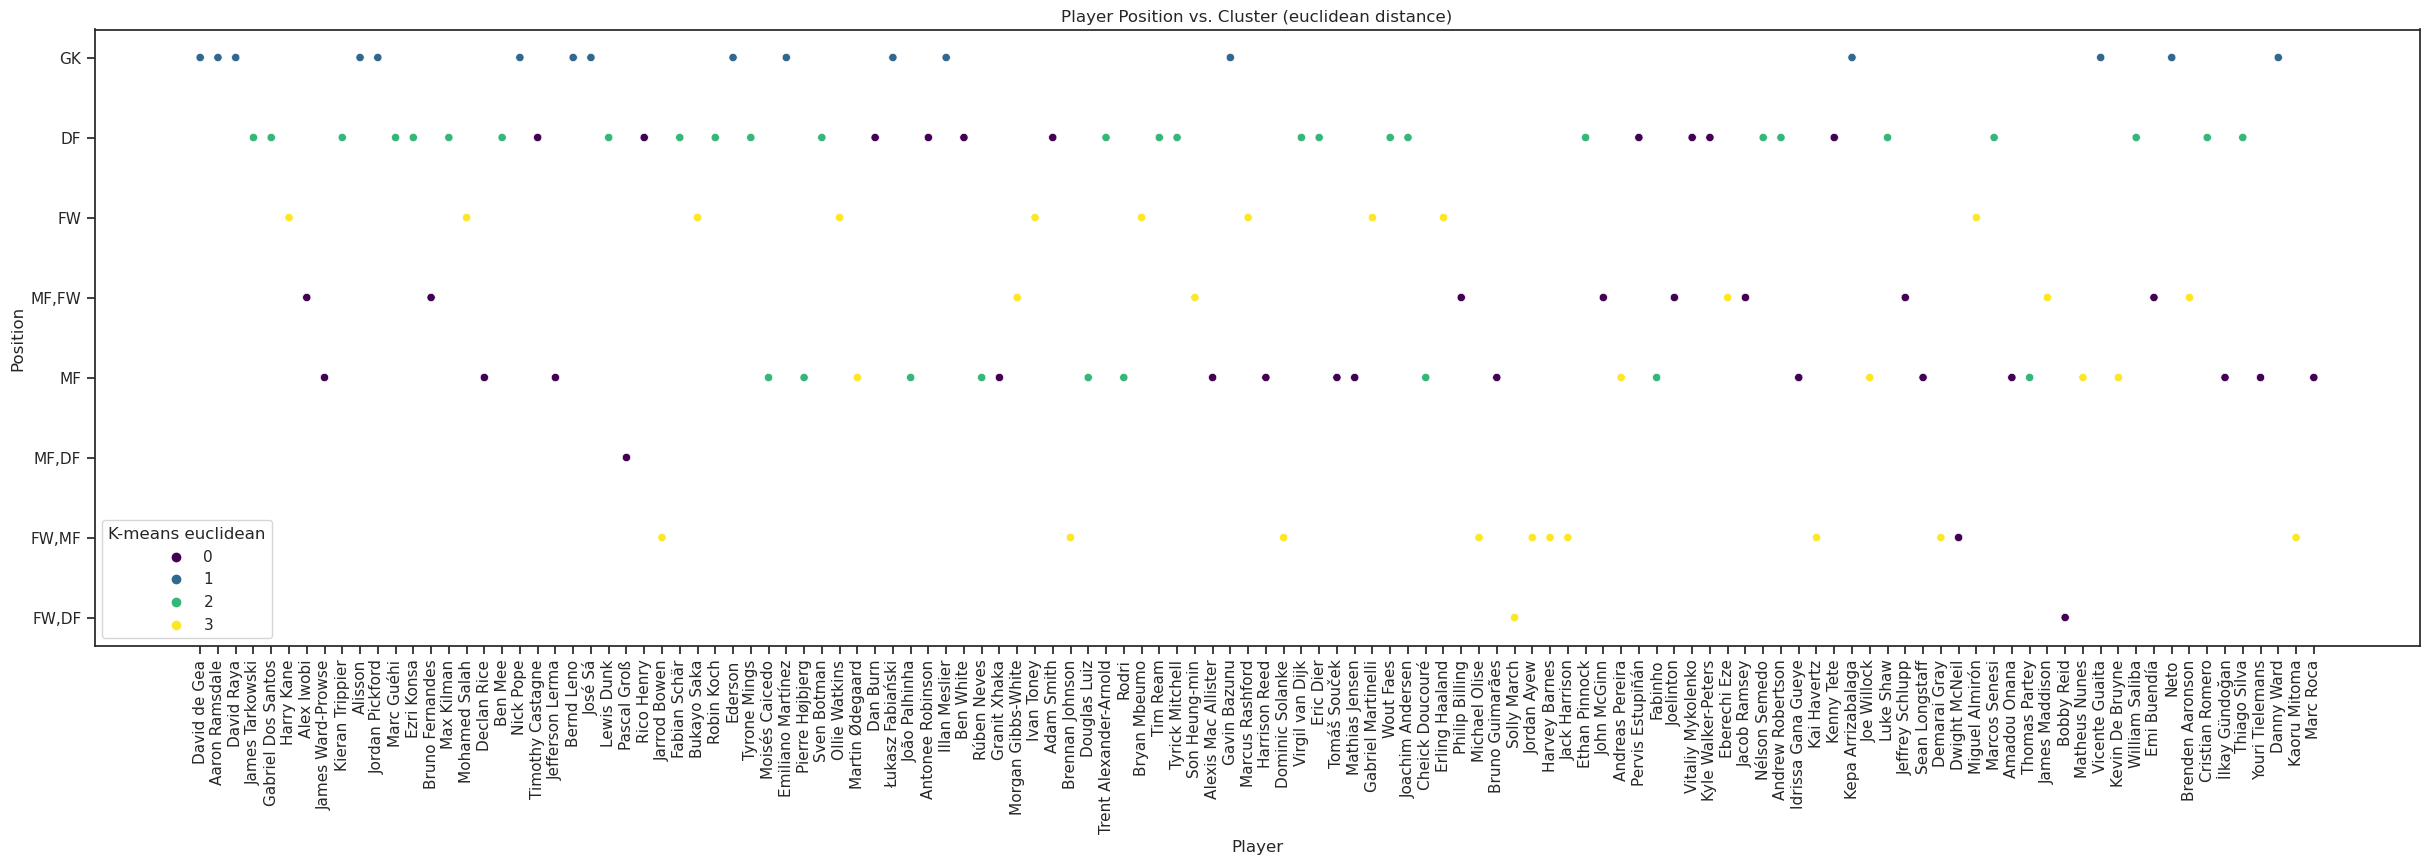

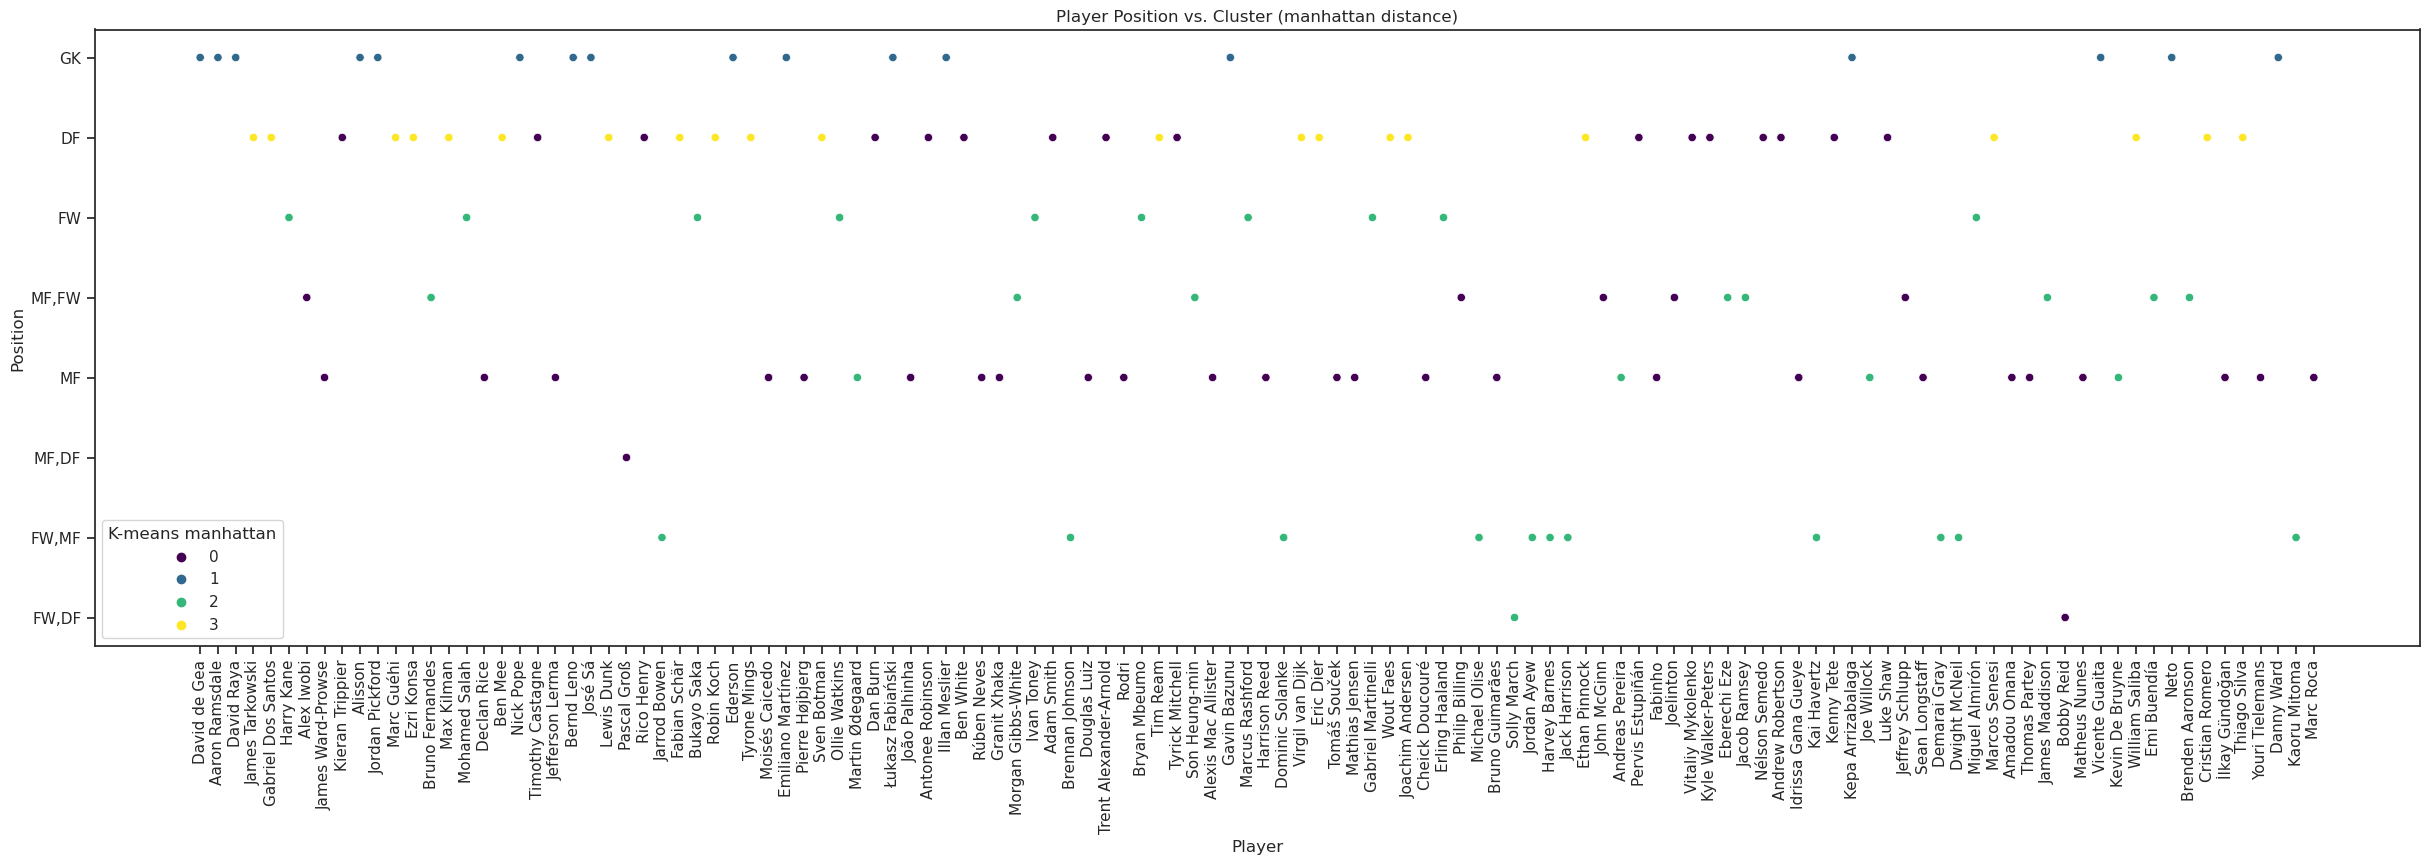

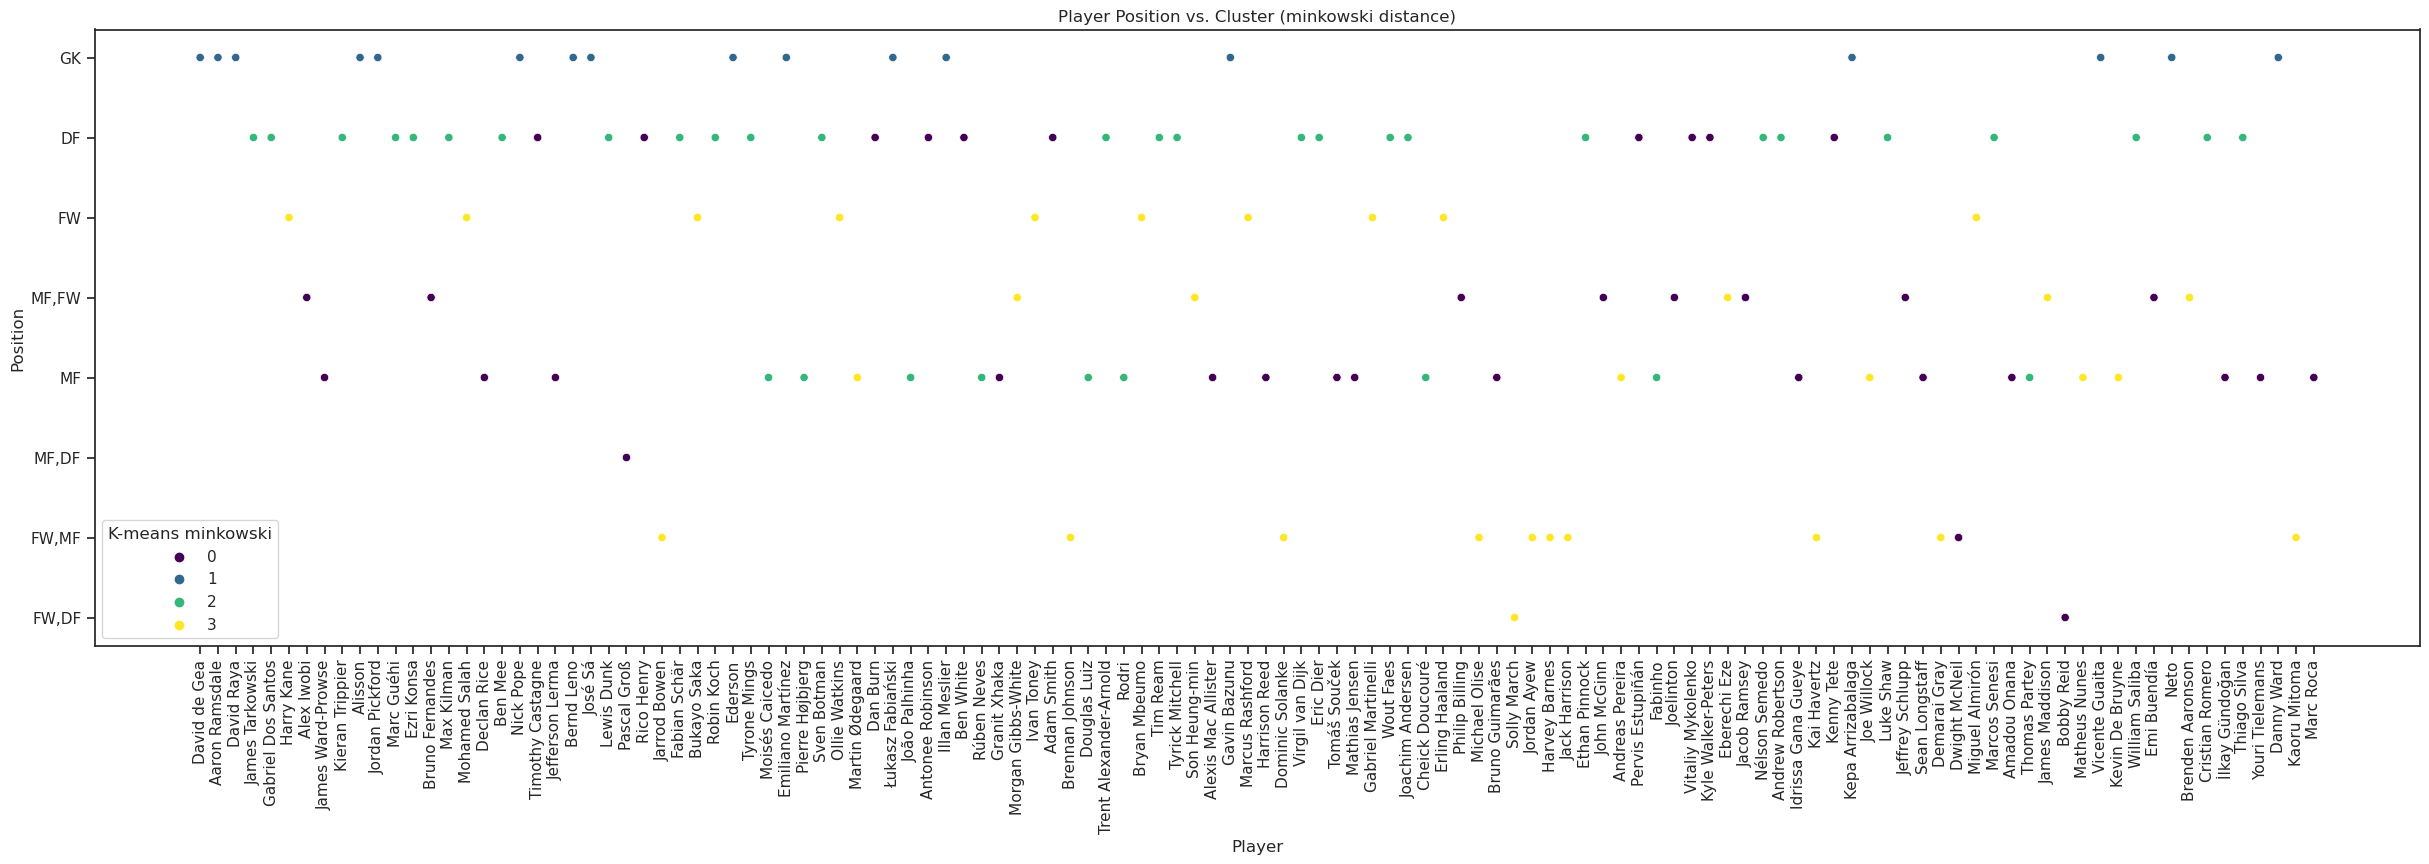

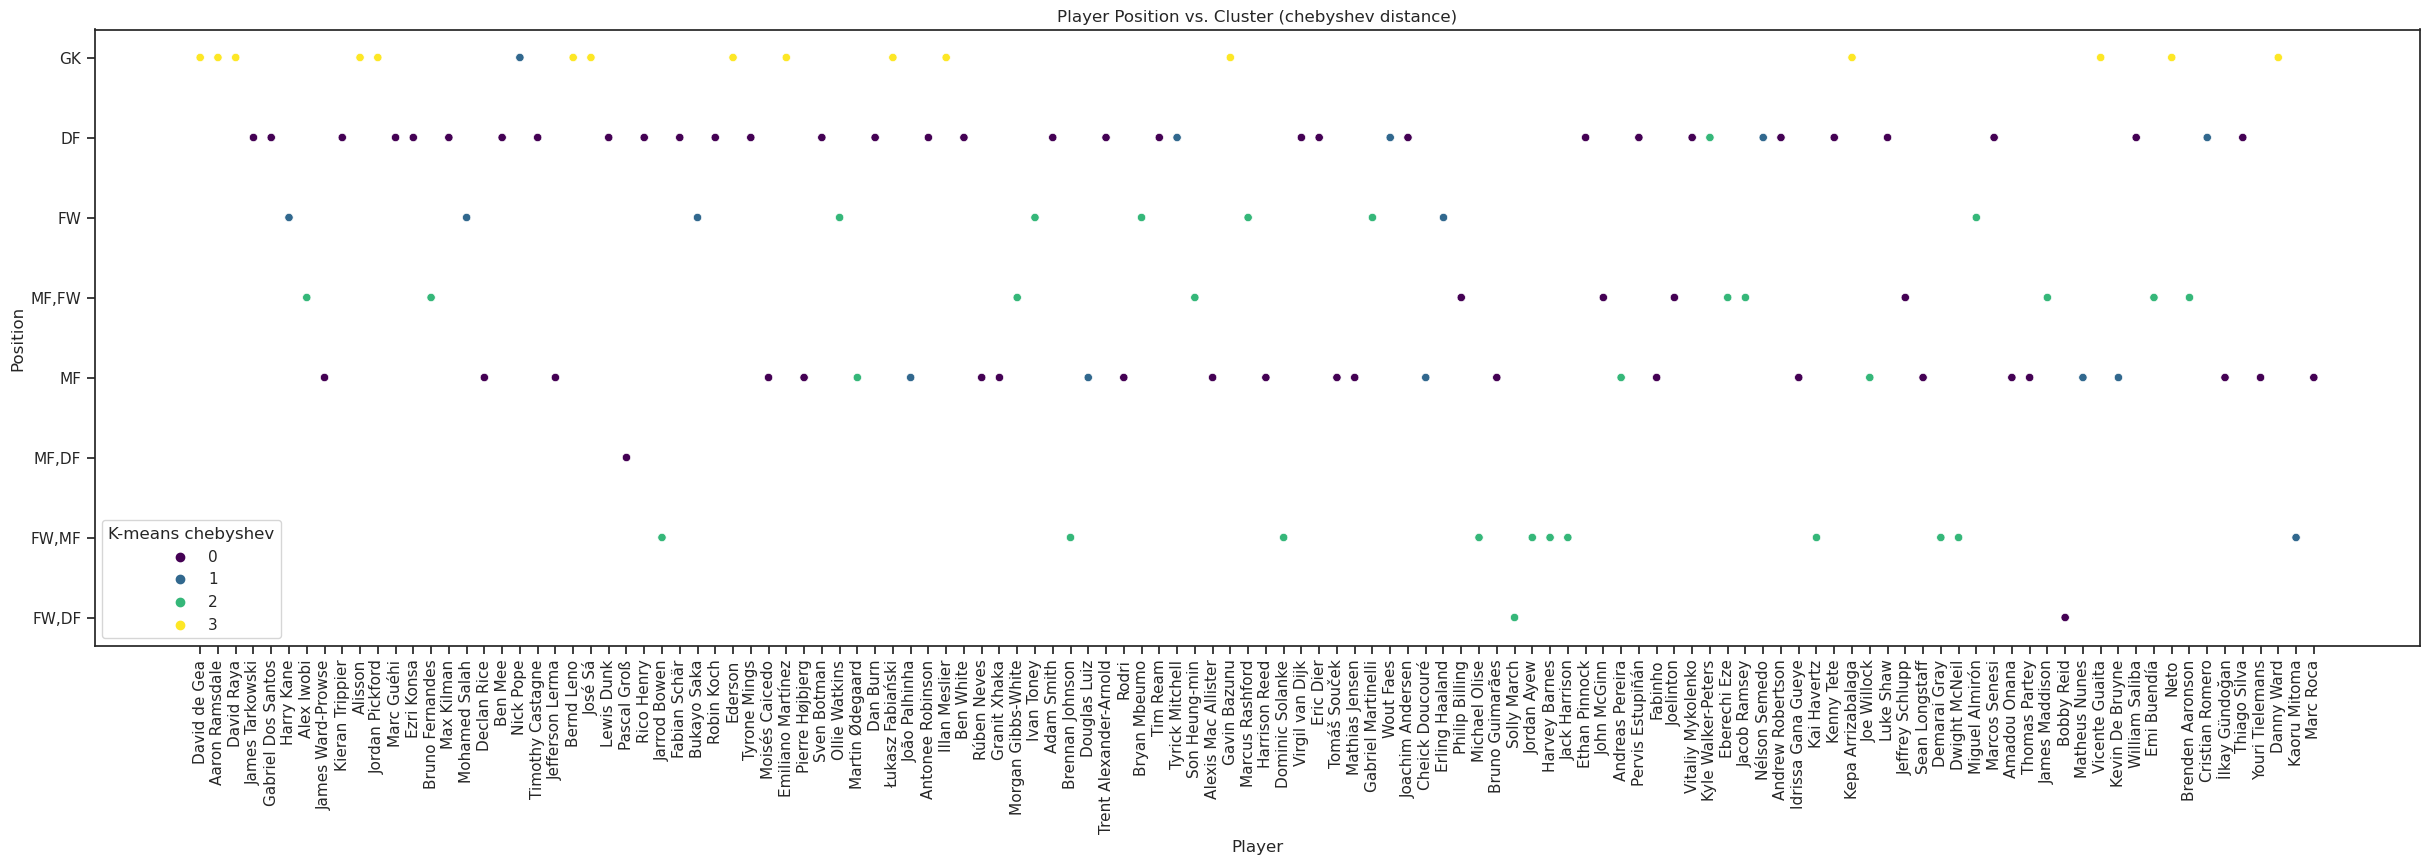

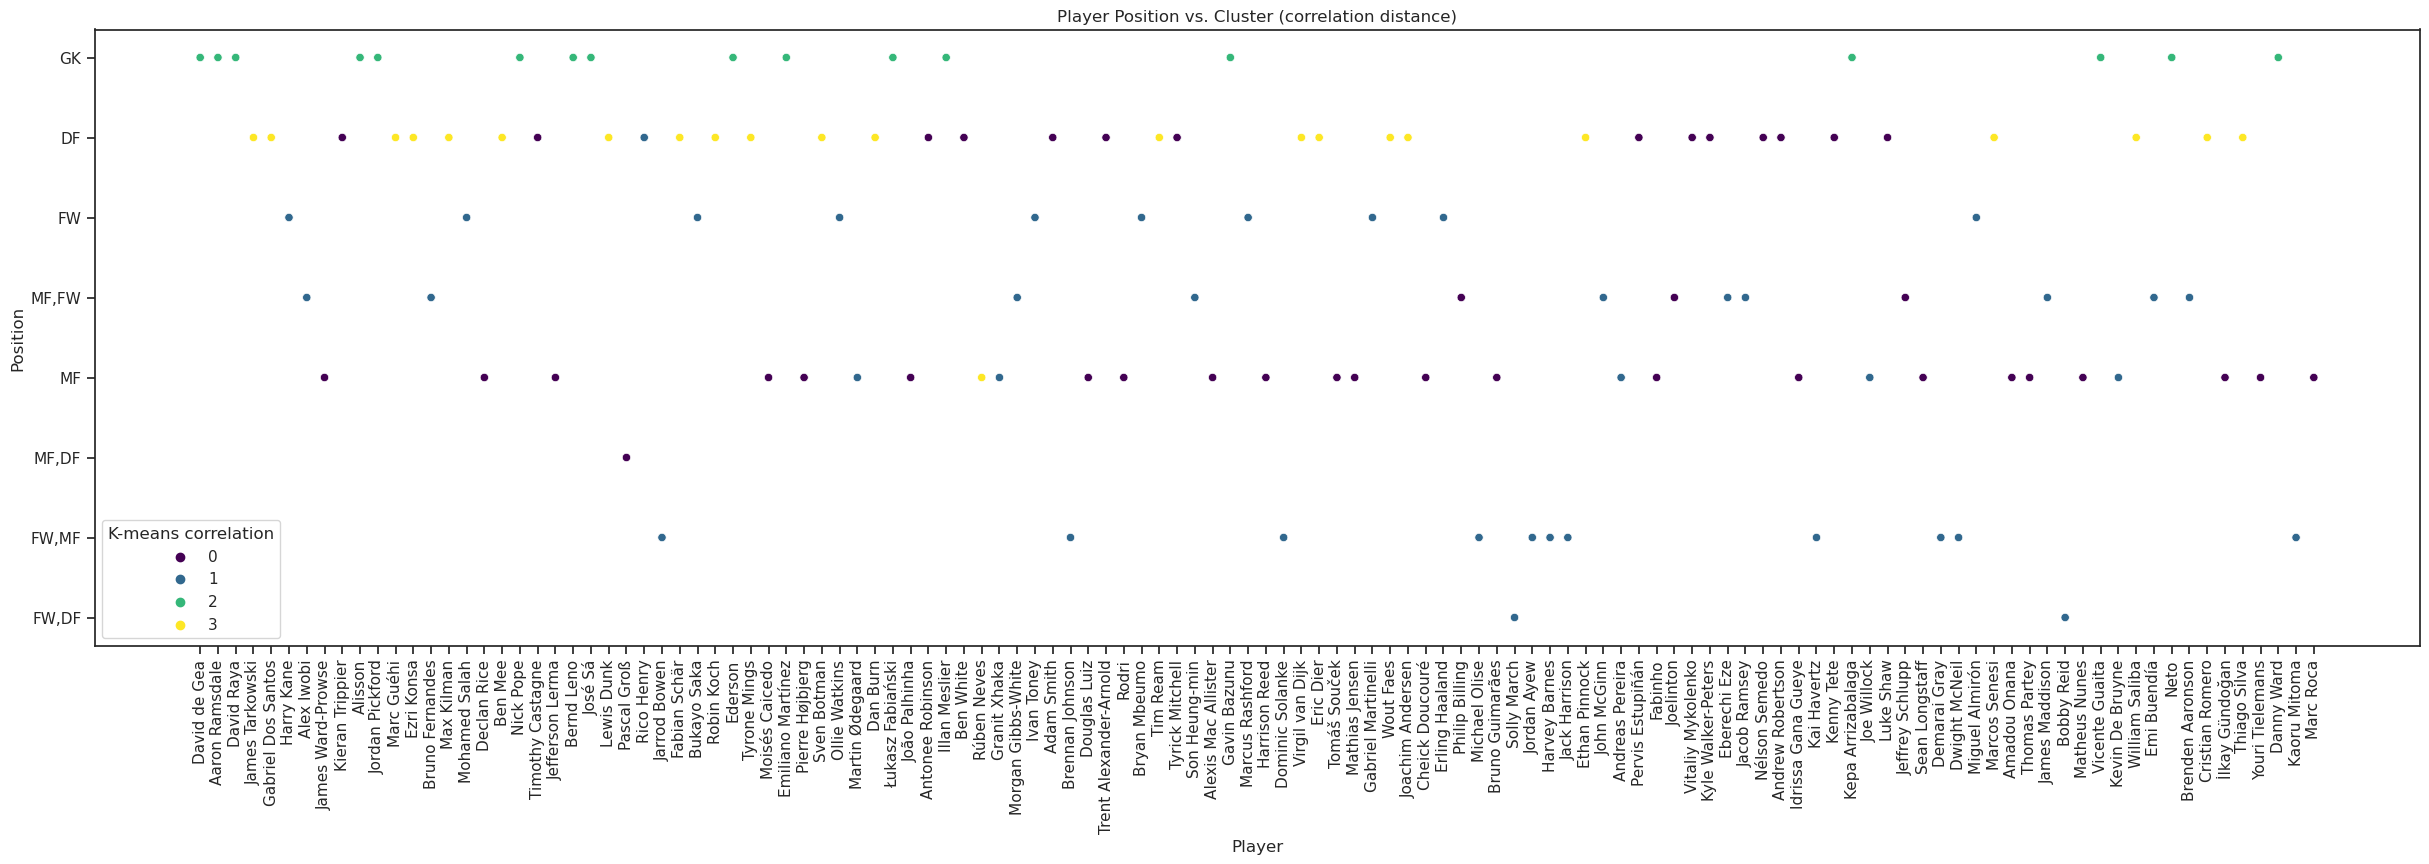

In [210]:
# Iterate over distance measures
for measure in distance_measures:
    # Create the plot
    plt.figure(figsize=(30, 8))  # Increase the figure size for wider plots
    sns.scatterplot(data=df_combined, x="Name", y='Position', hue=f'K-means {measure}', palette='viridis', hue_order=[0, 1, 2, 3, 4])
    plt.xlabel('Player')
    plt.ylabel('Position')
    plt.title(f'Player Position vs. Cluster ({measure} distance)')
    plt.xticks(rotation=90)  # Orient the names vertically
    plt.show()

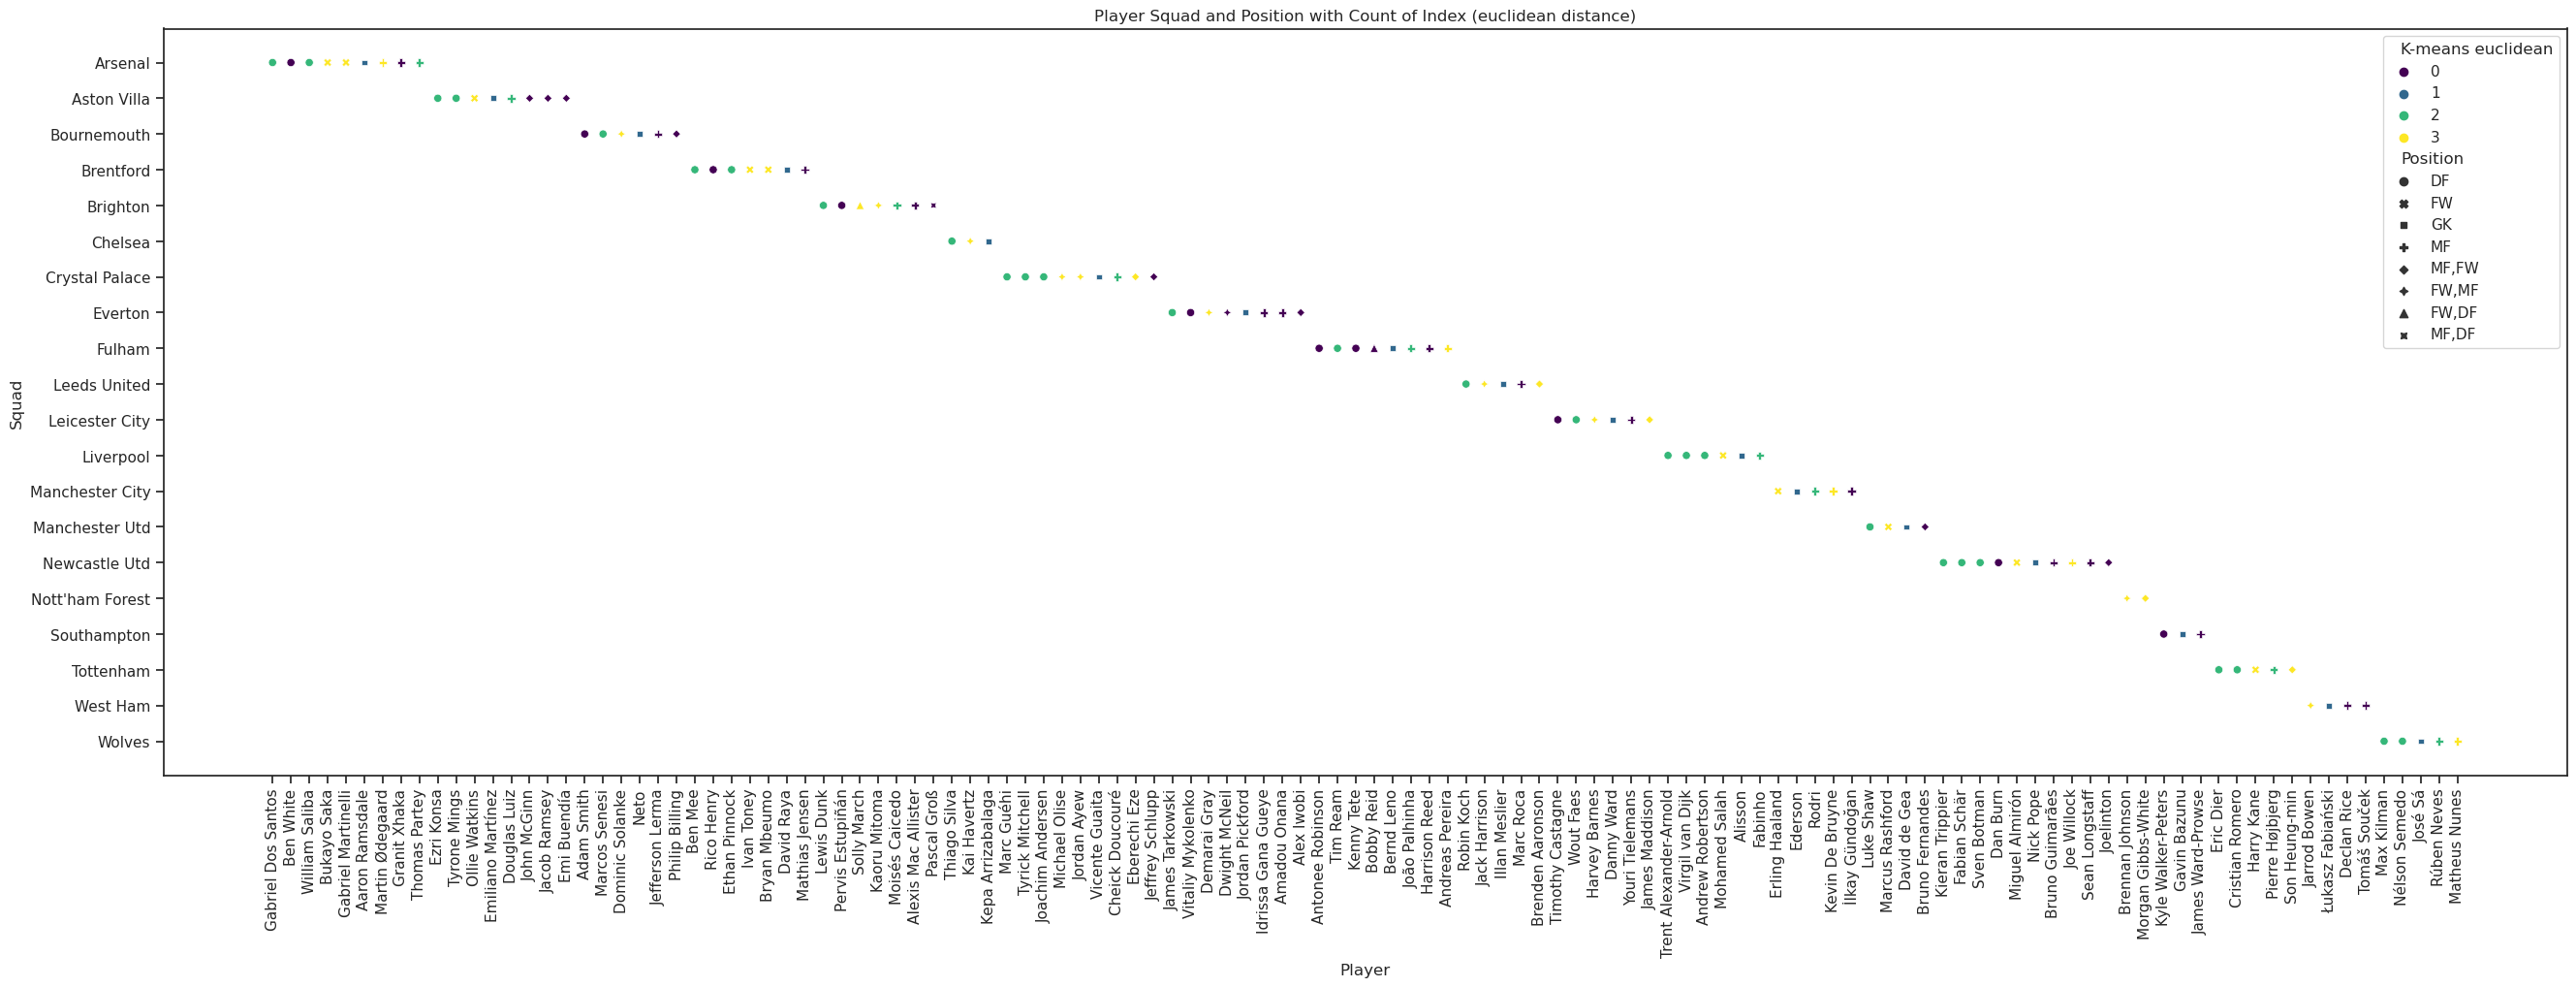

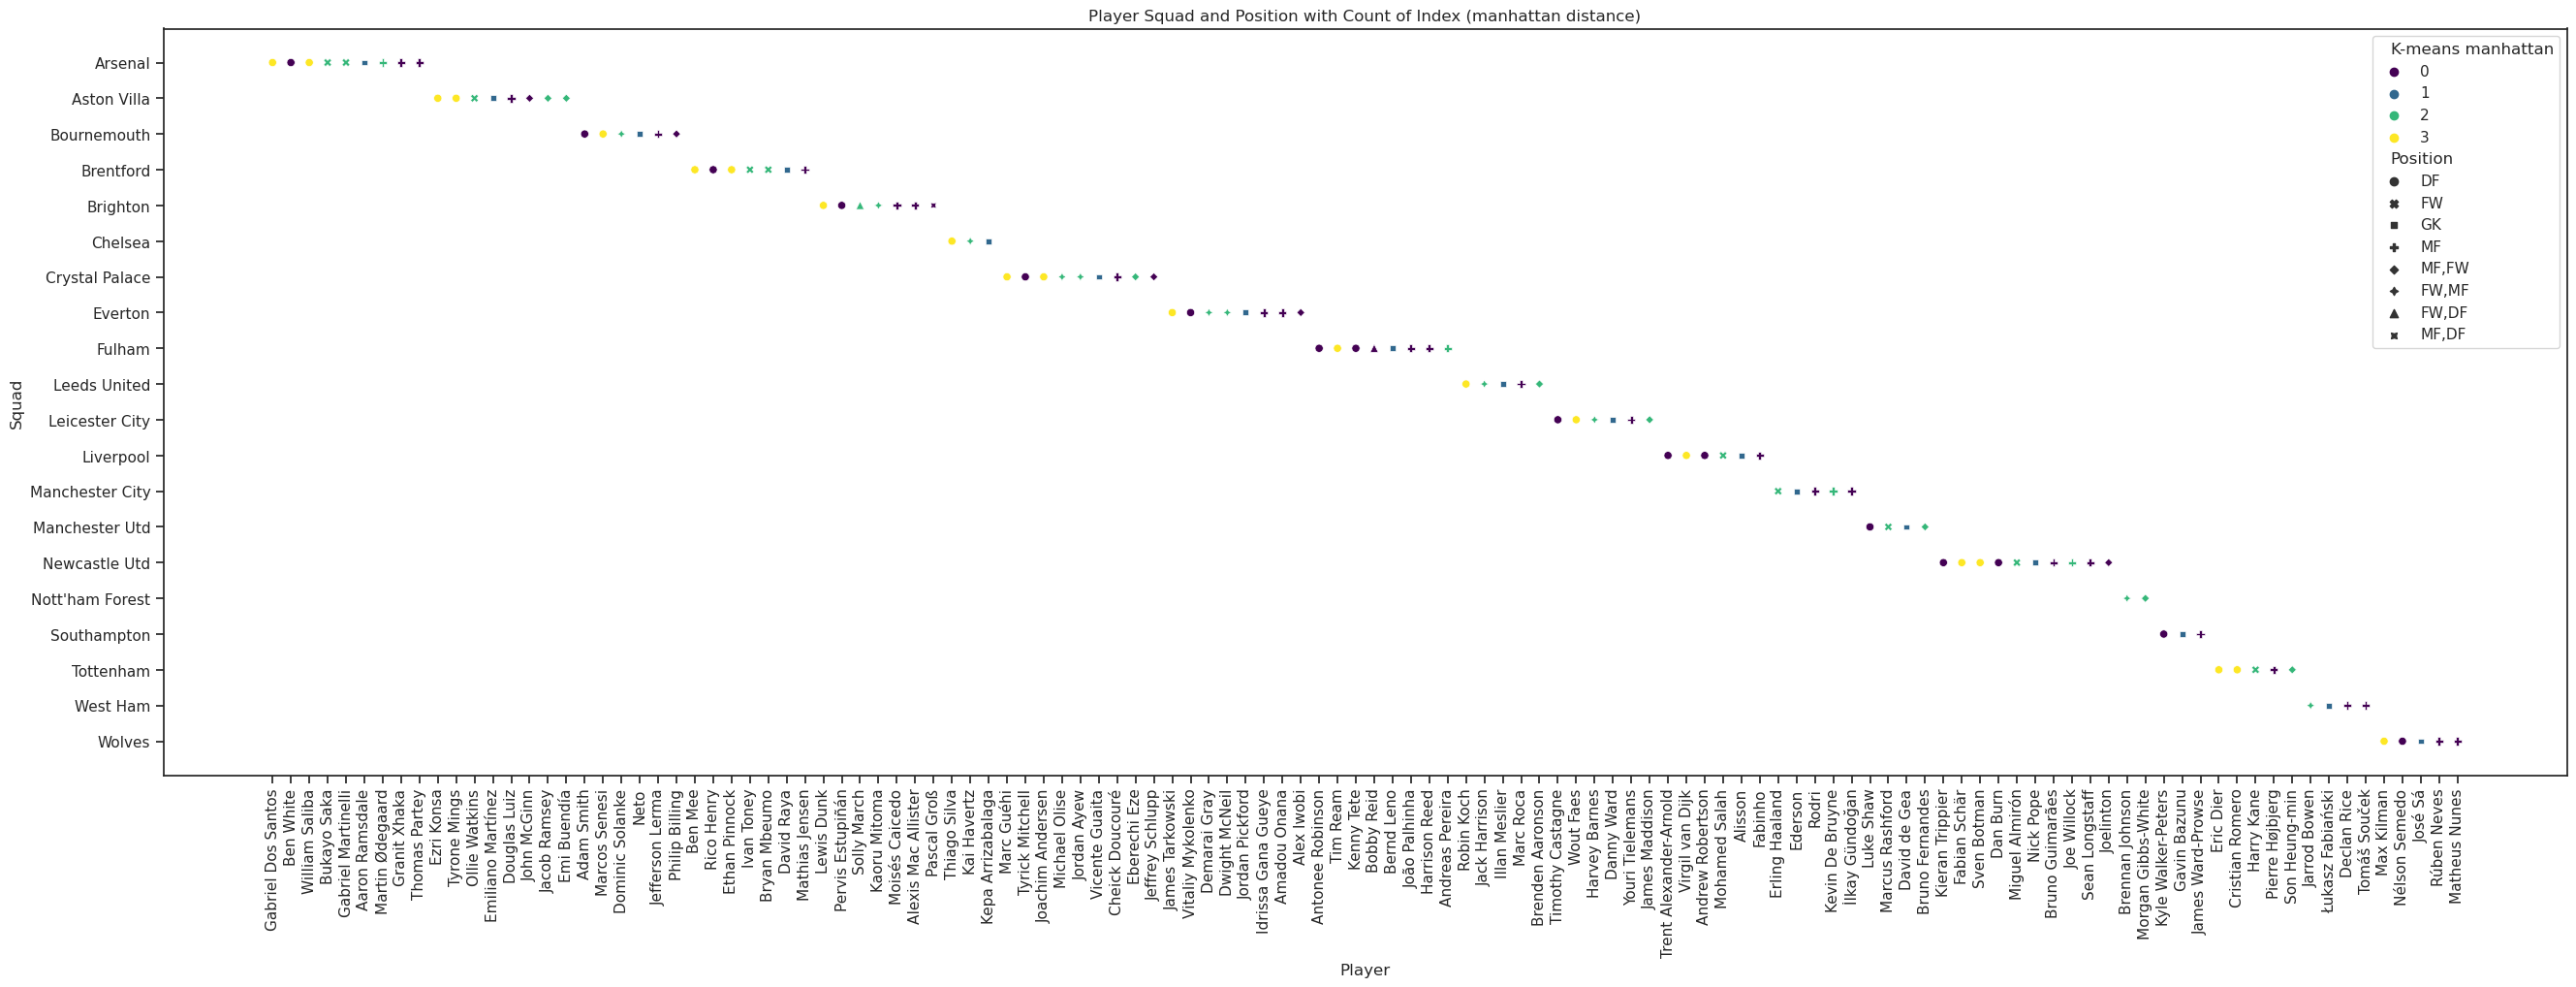

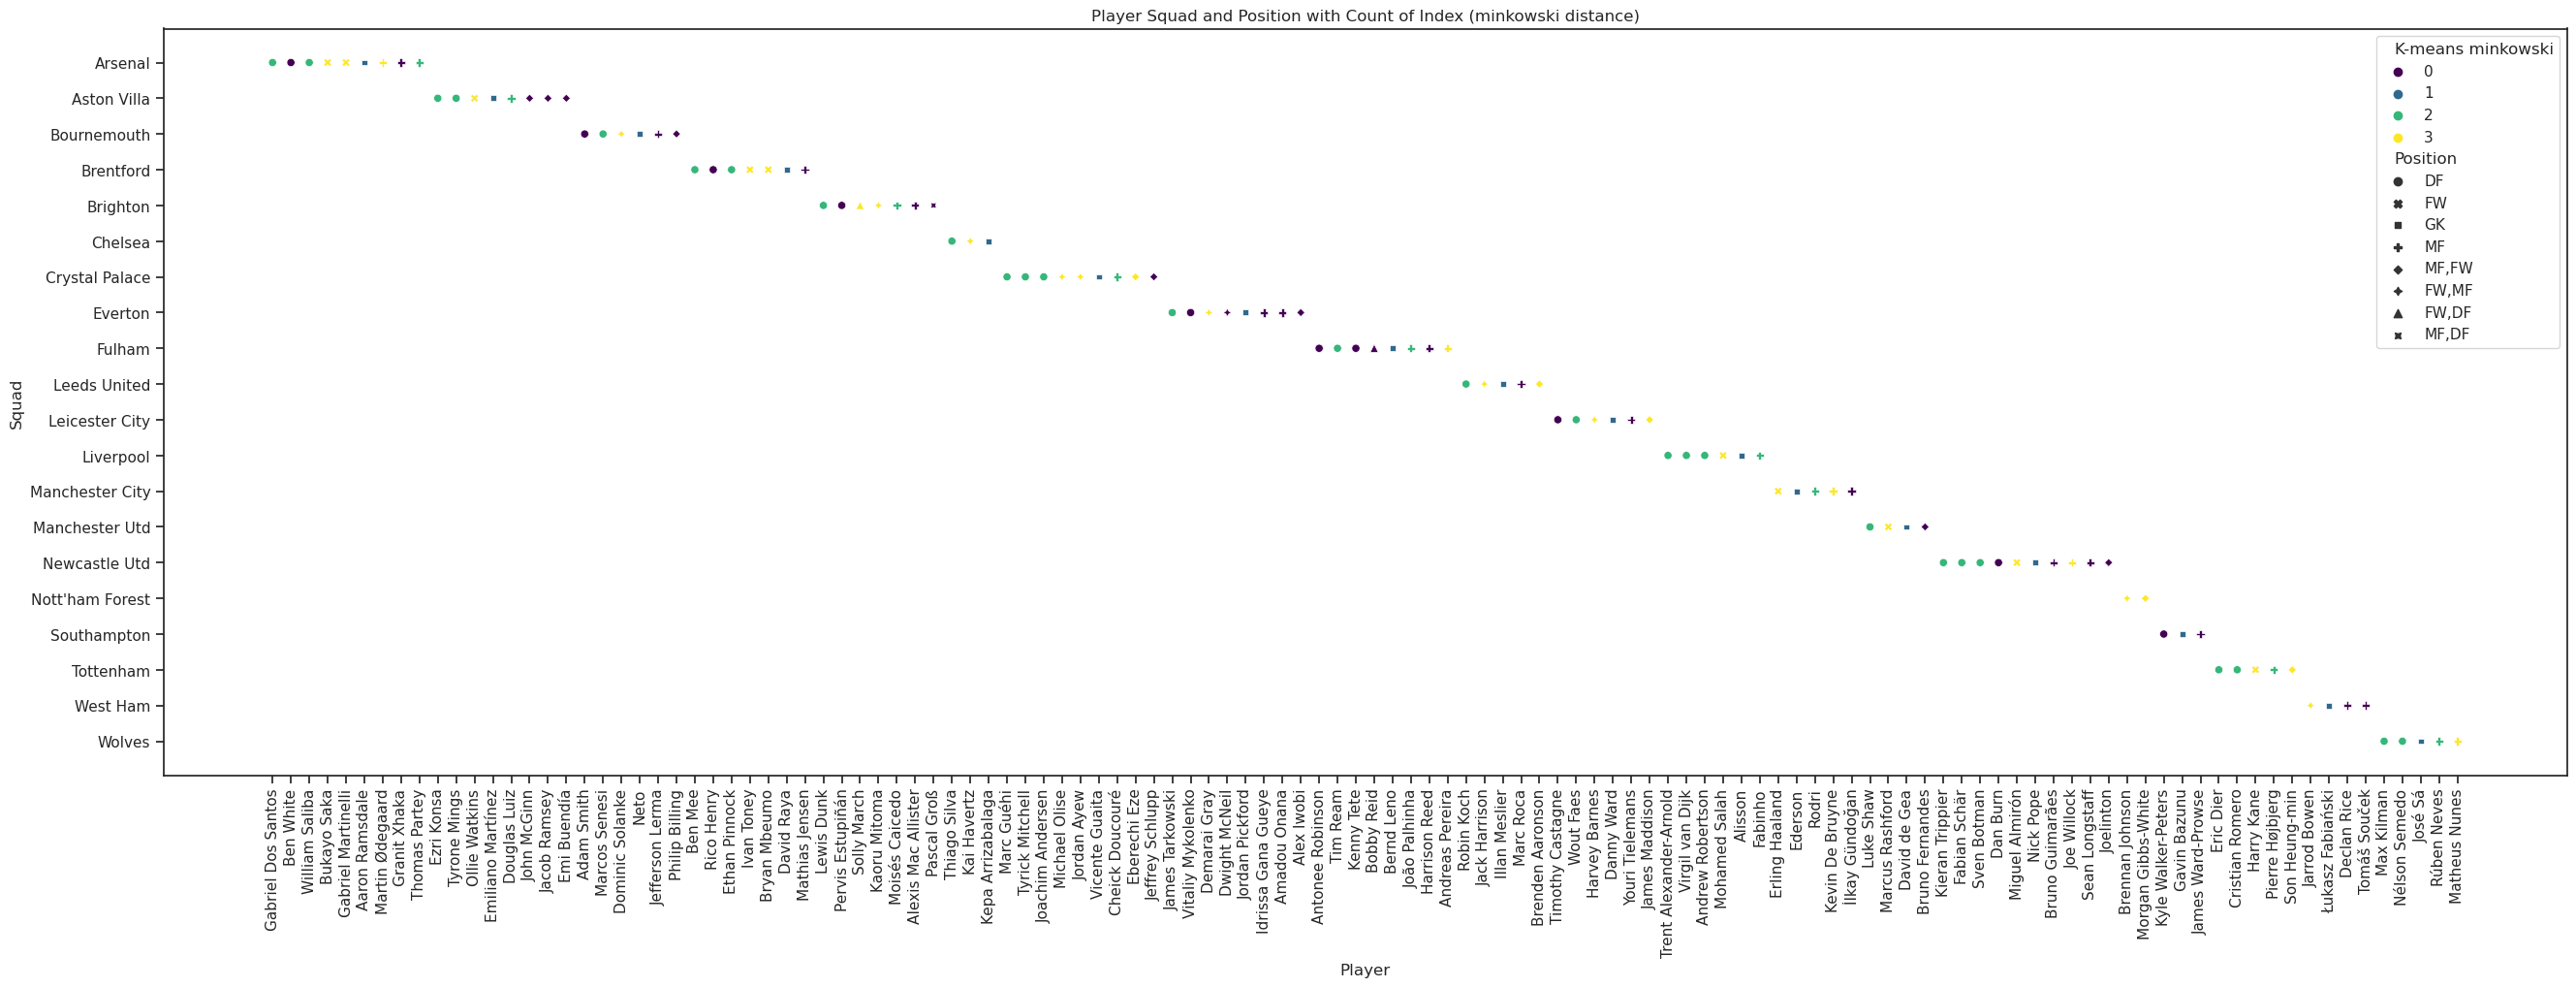

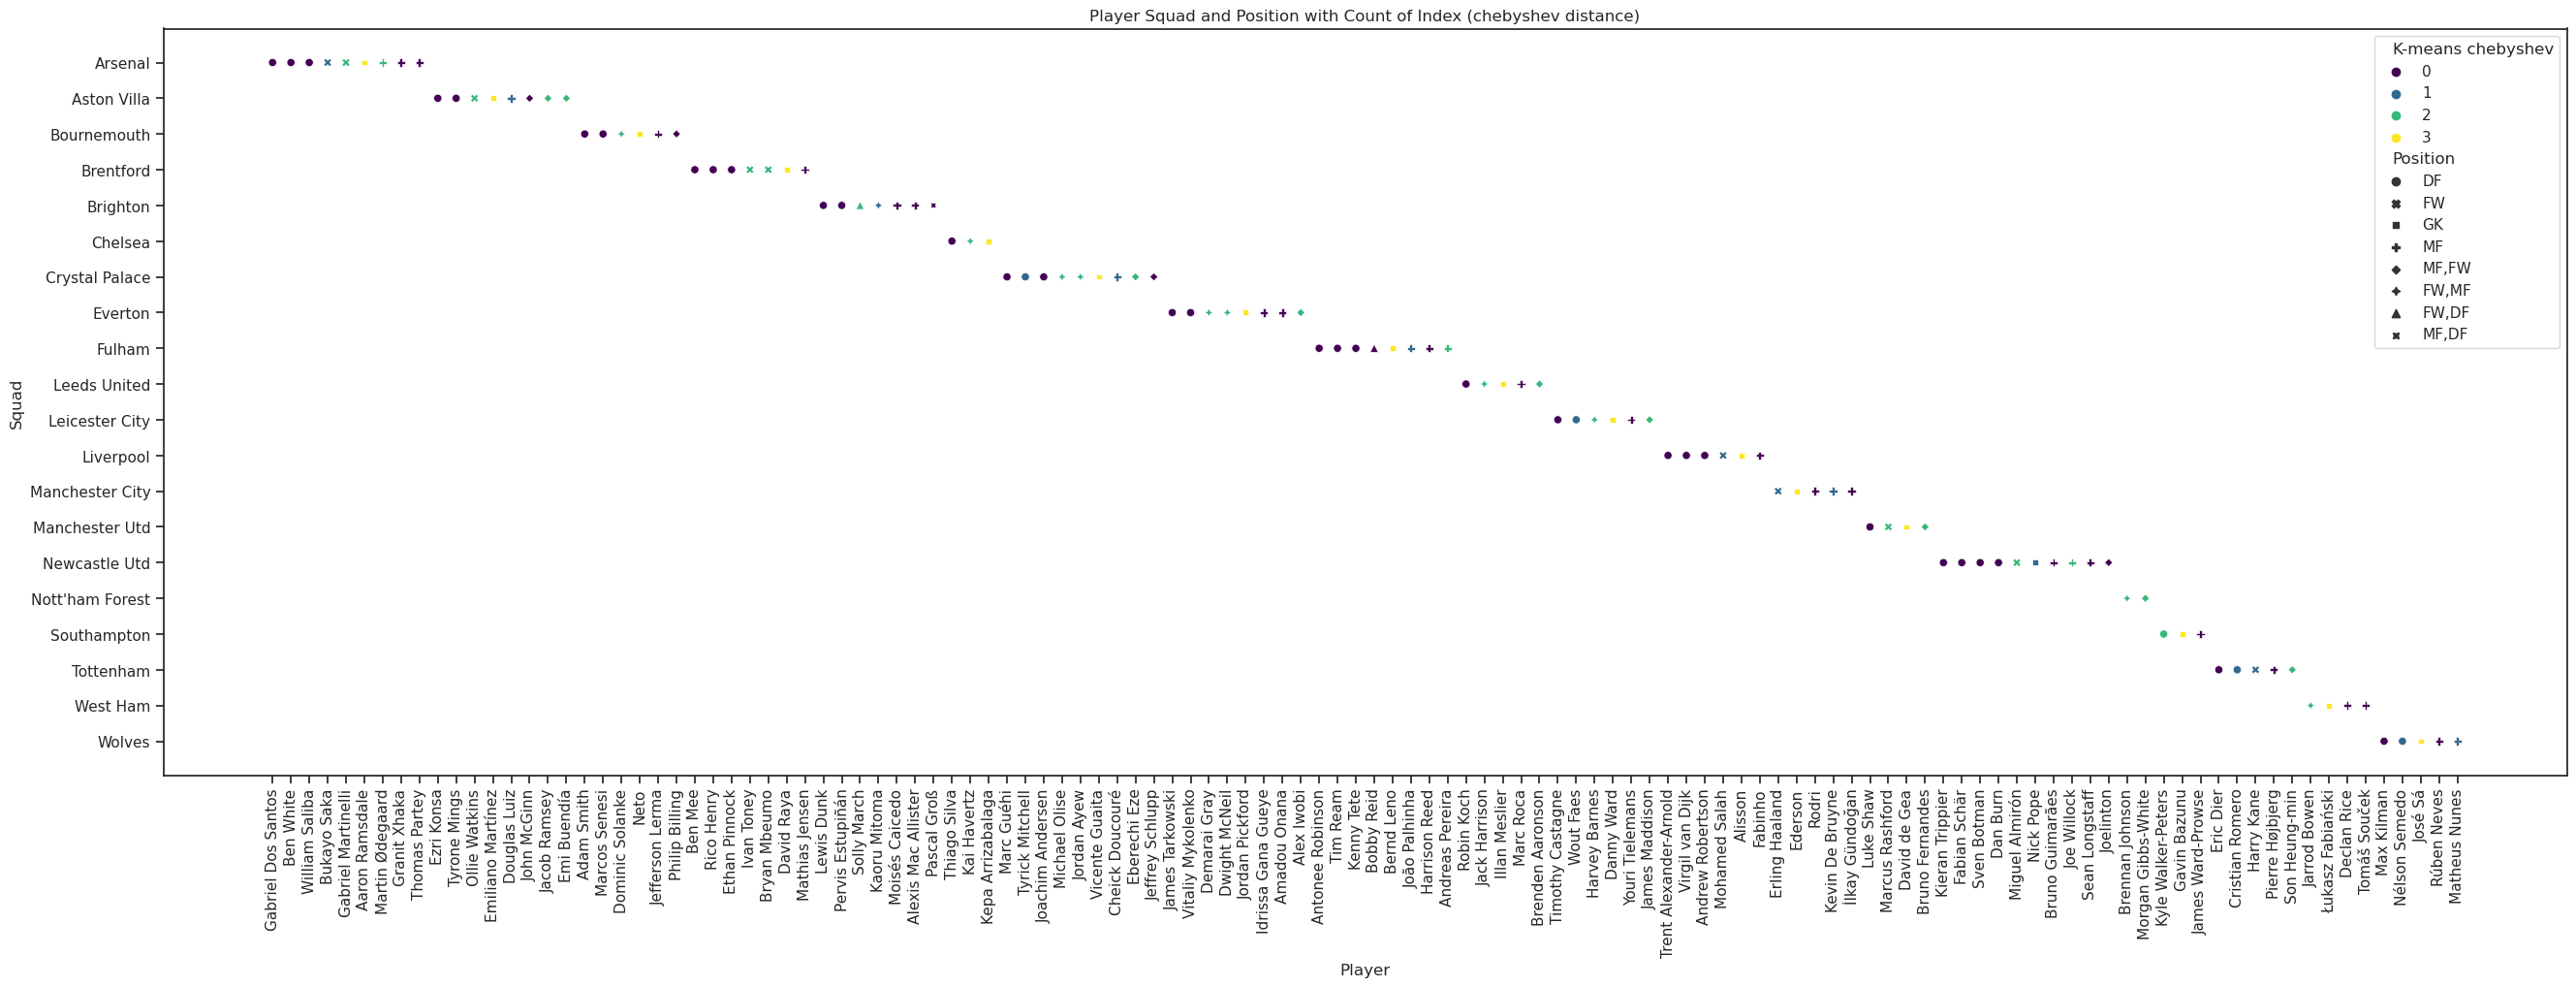

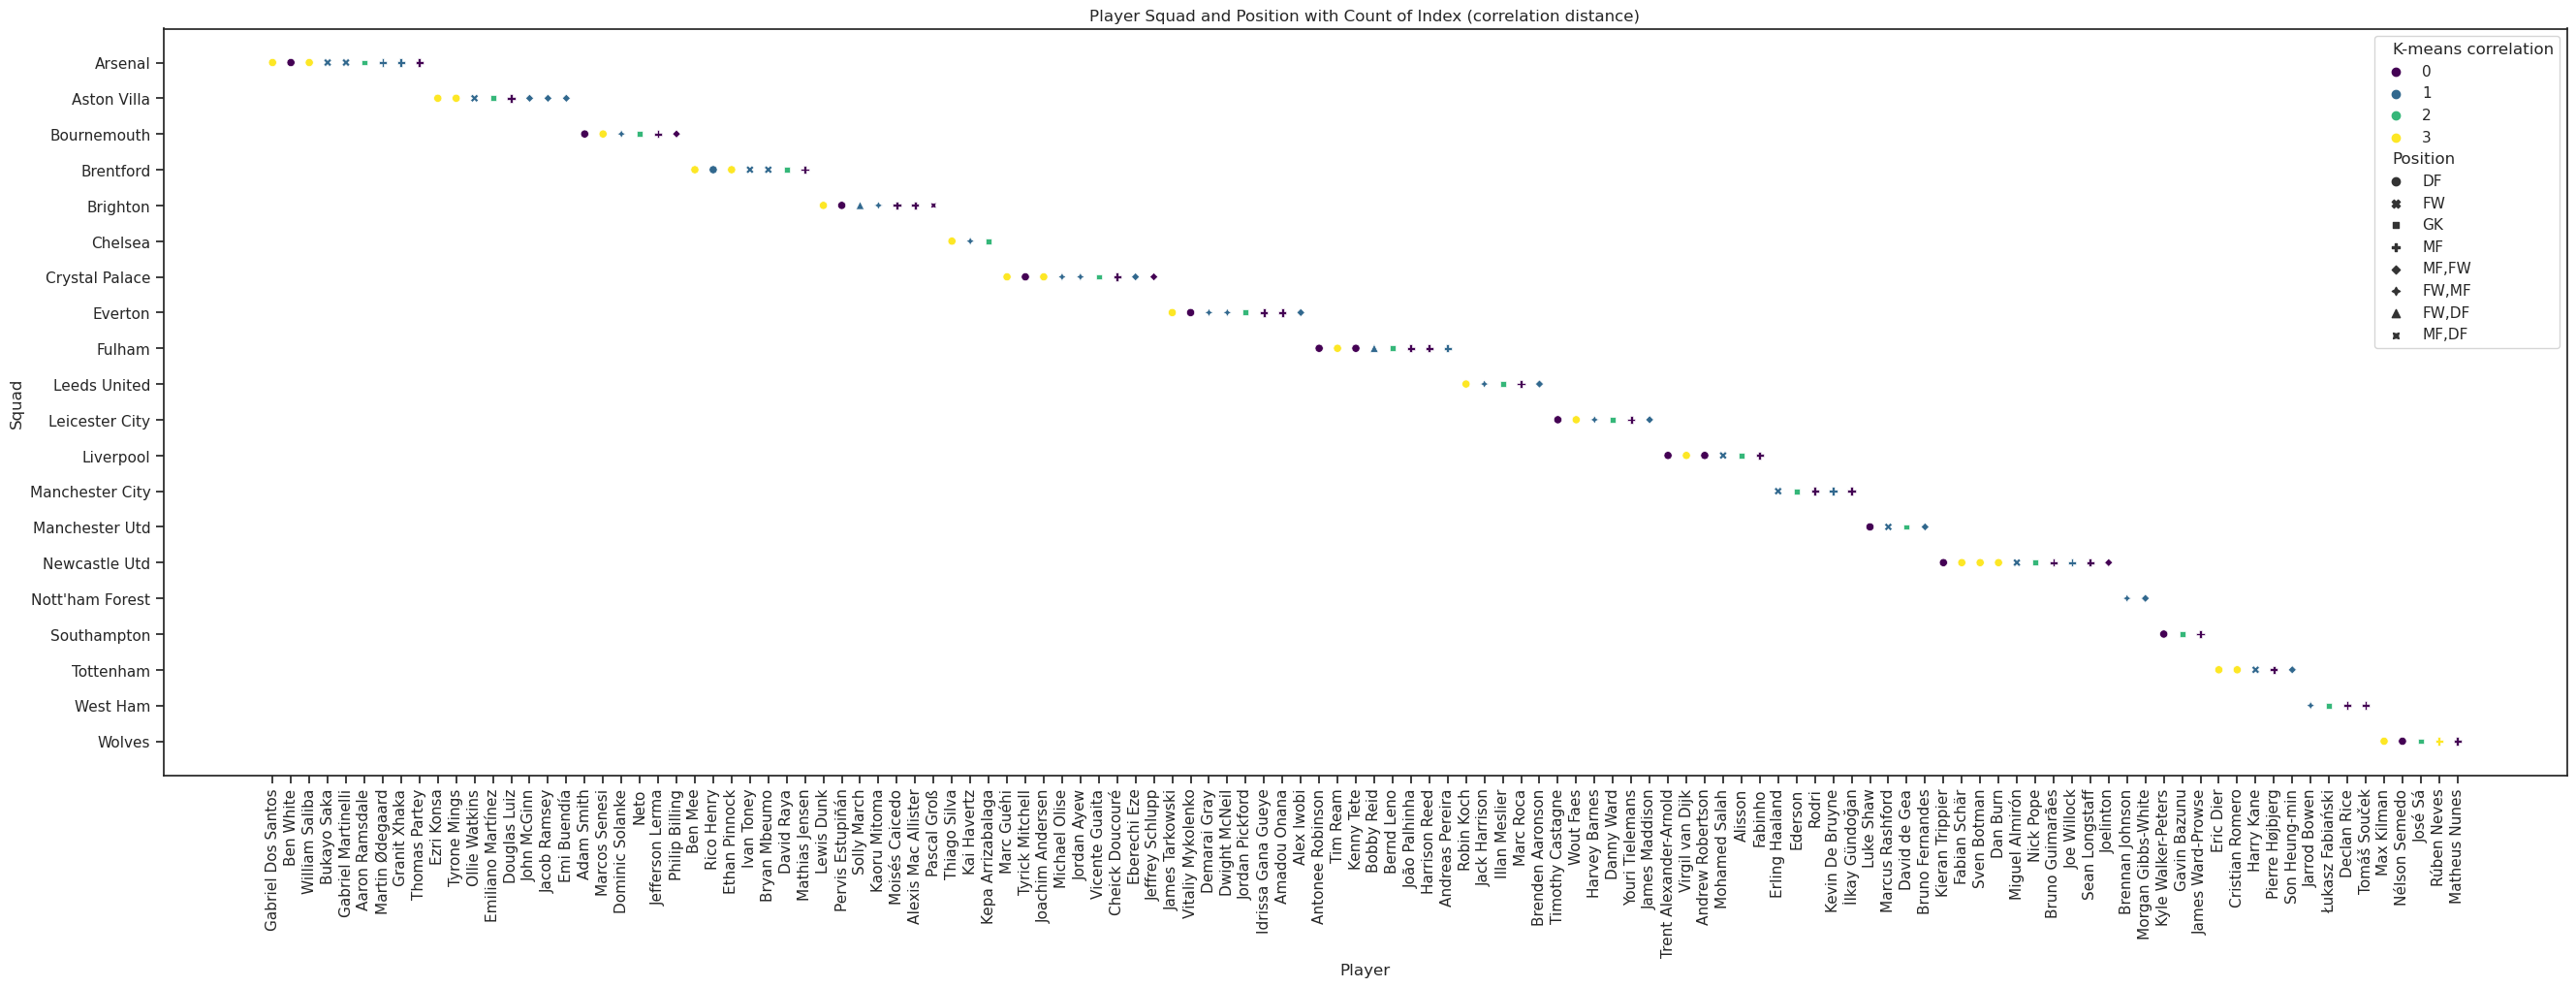

In [211]:
# Sort players by position
df_combined.sort_values(by=['Squad', 'Position'], inplace=True)
# Iterate over distance measures
for measure in distance_measures:
    # Create the plot
    plt.figure(figsize=(32, 10))  # Increase the figure size for wider plots
    sns.scatterplot(data=df_combined, x=df_combined.index, y='Squad', hue=f'K-means {measure}', palette='viridis', style='Position')
    plt.xlabel('Player')
    plt.ylabel('Squad')
    plt.title(f'Player Squad and Position with Count of Index ({measure} distance)')
    plt.xticks(rotation=90)
    plt.show()


#### Aglomerative - resaults

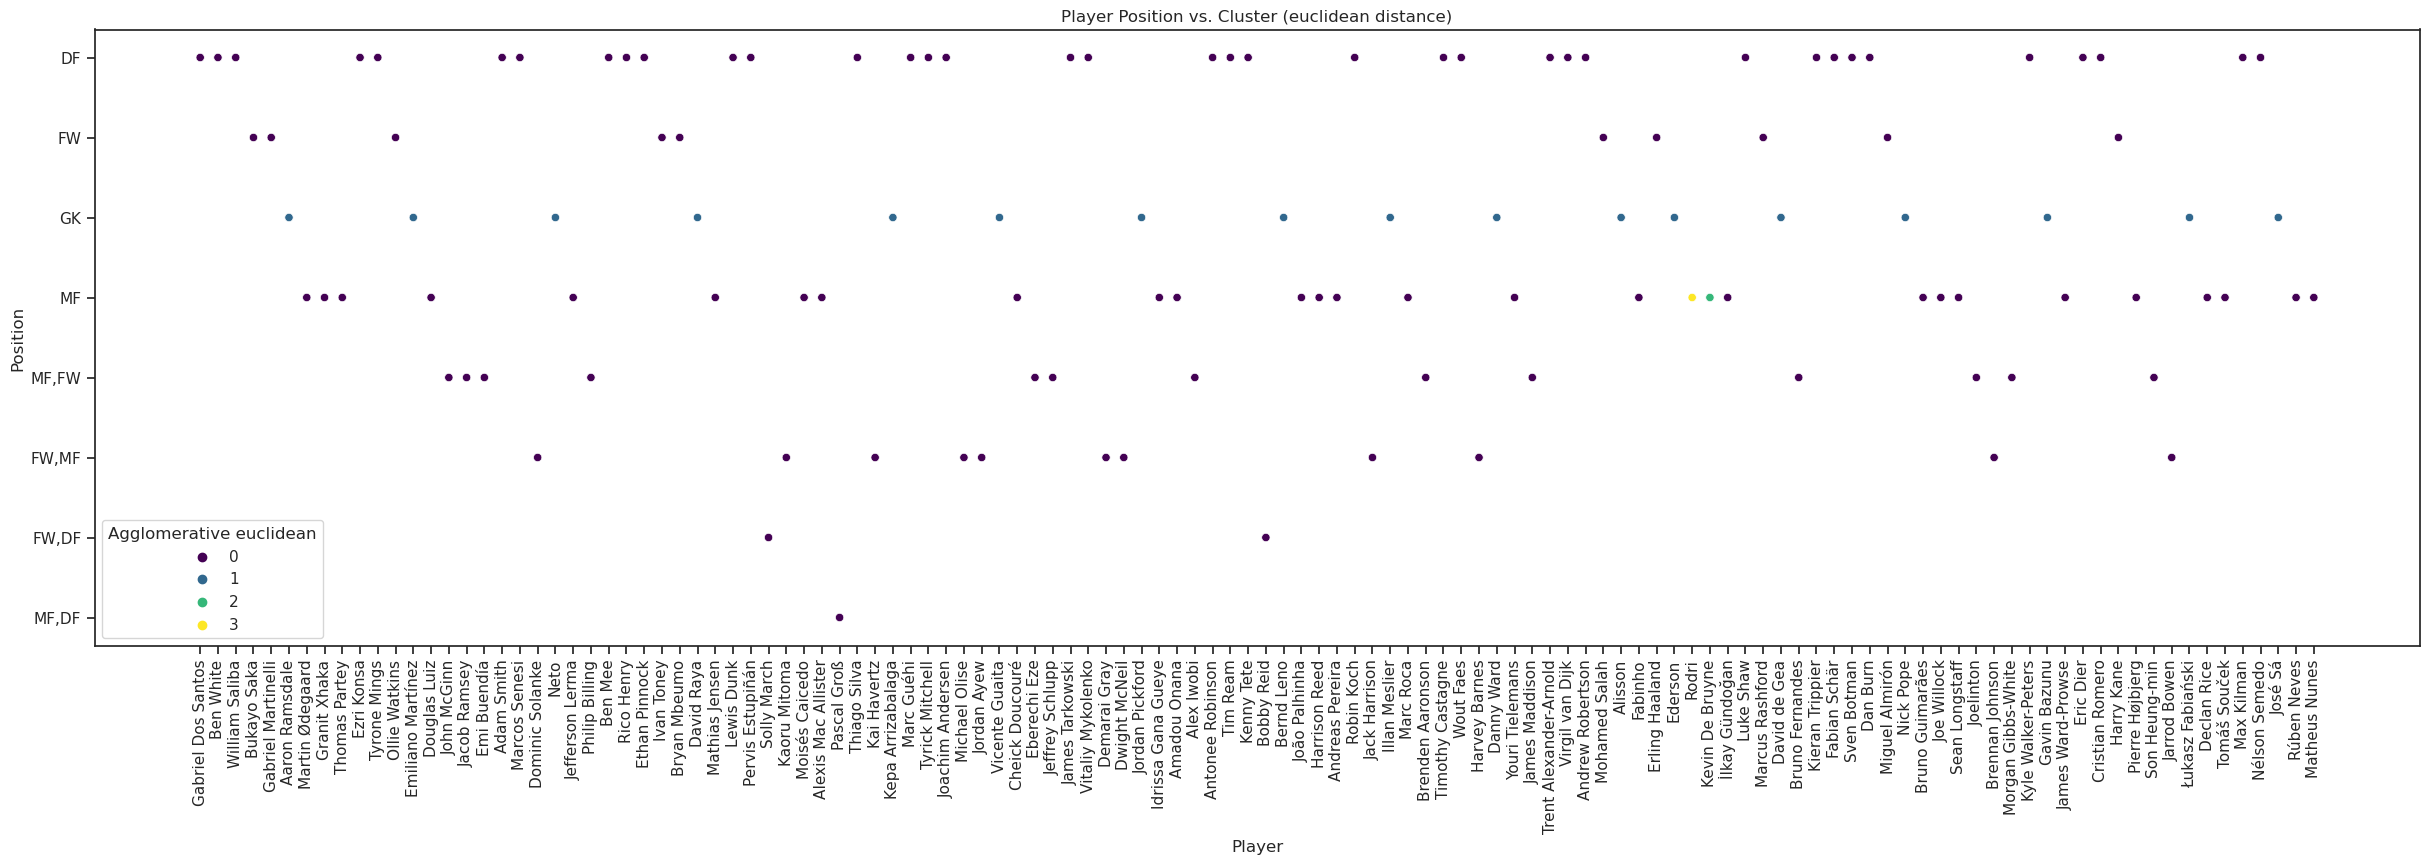

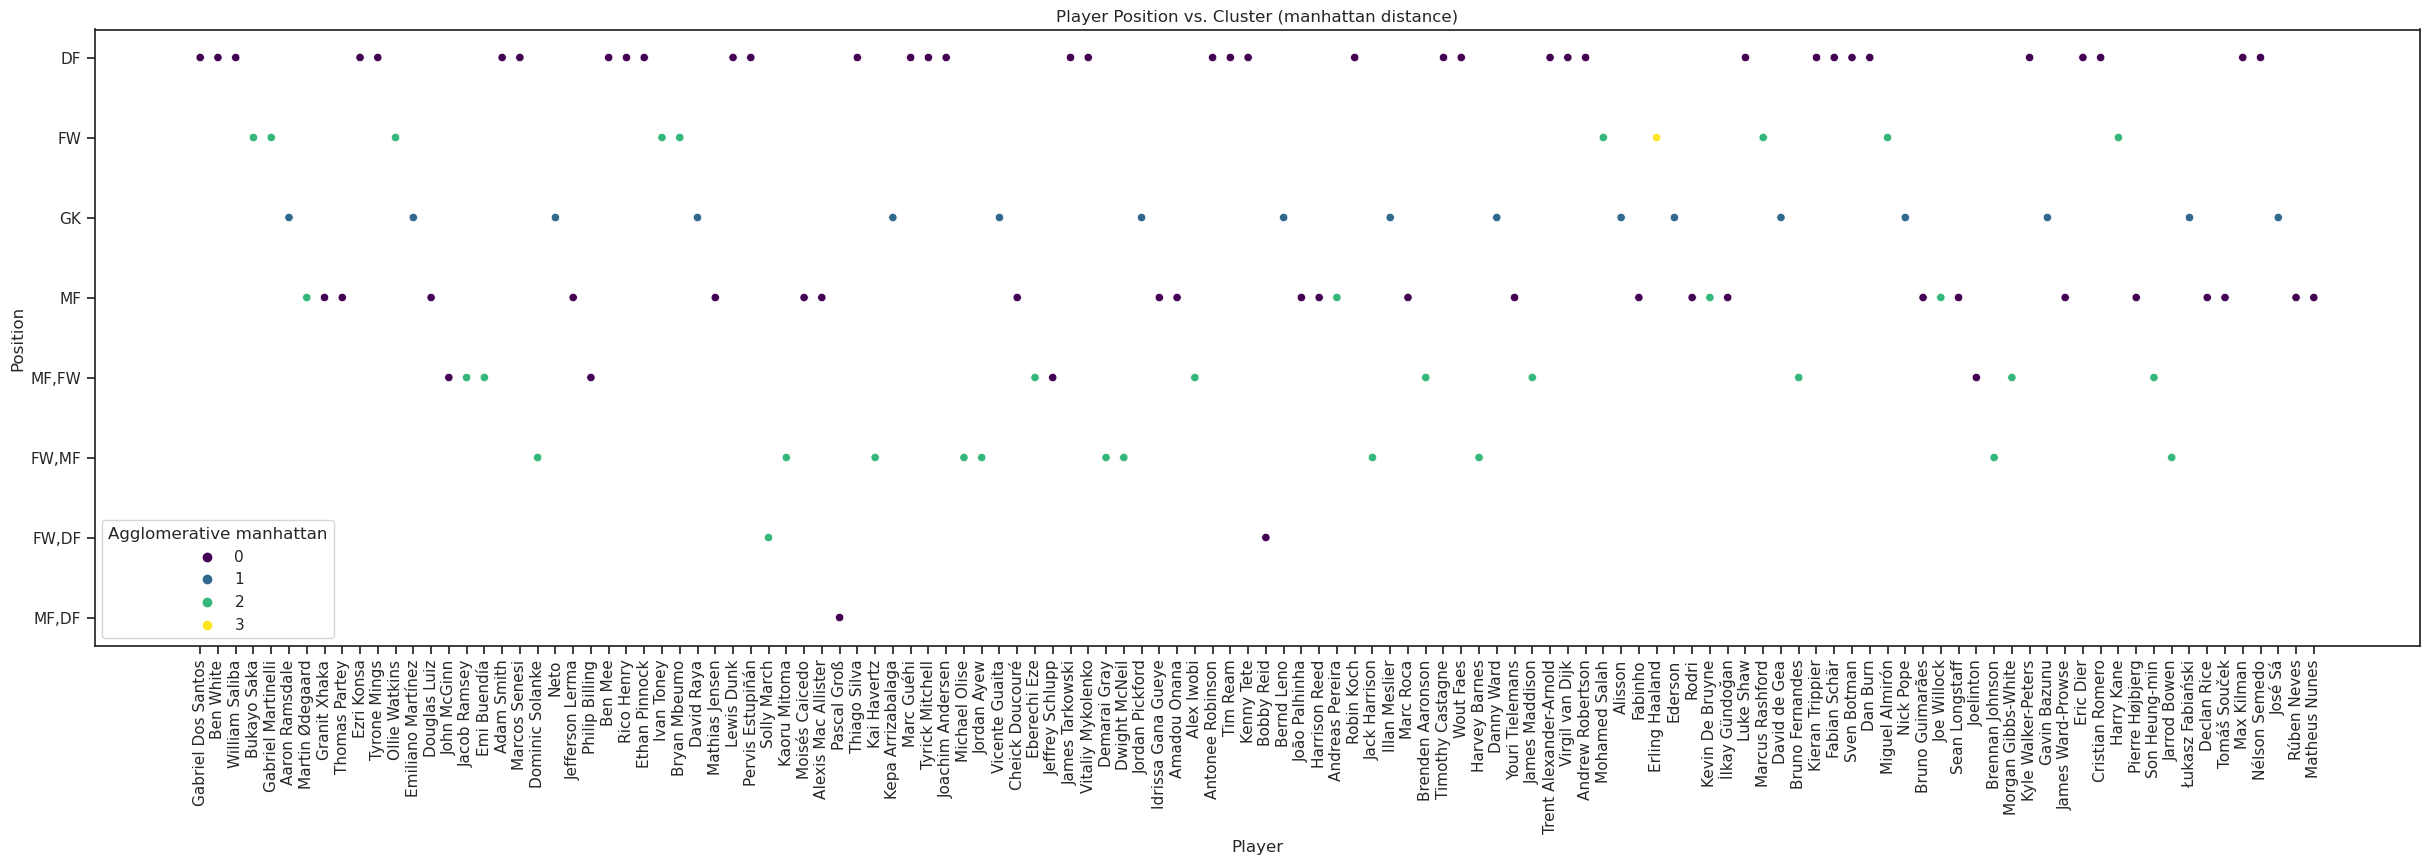

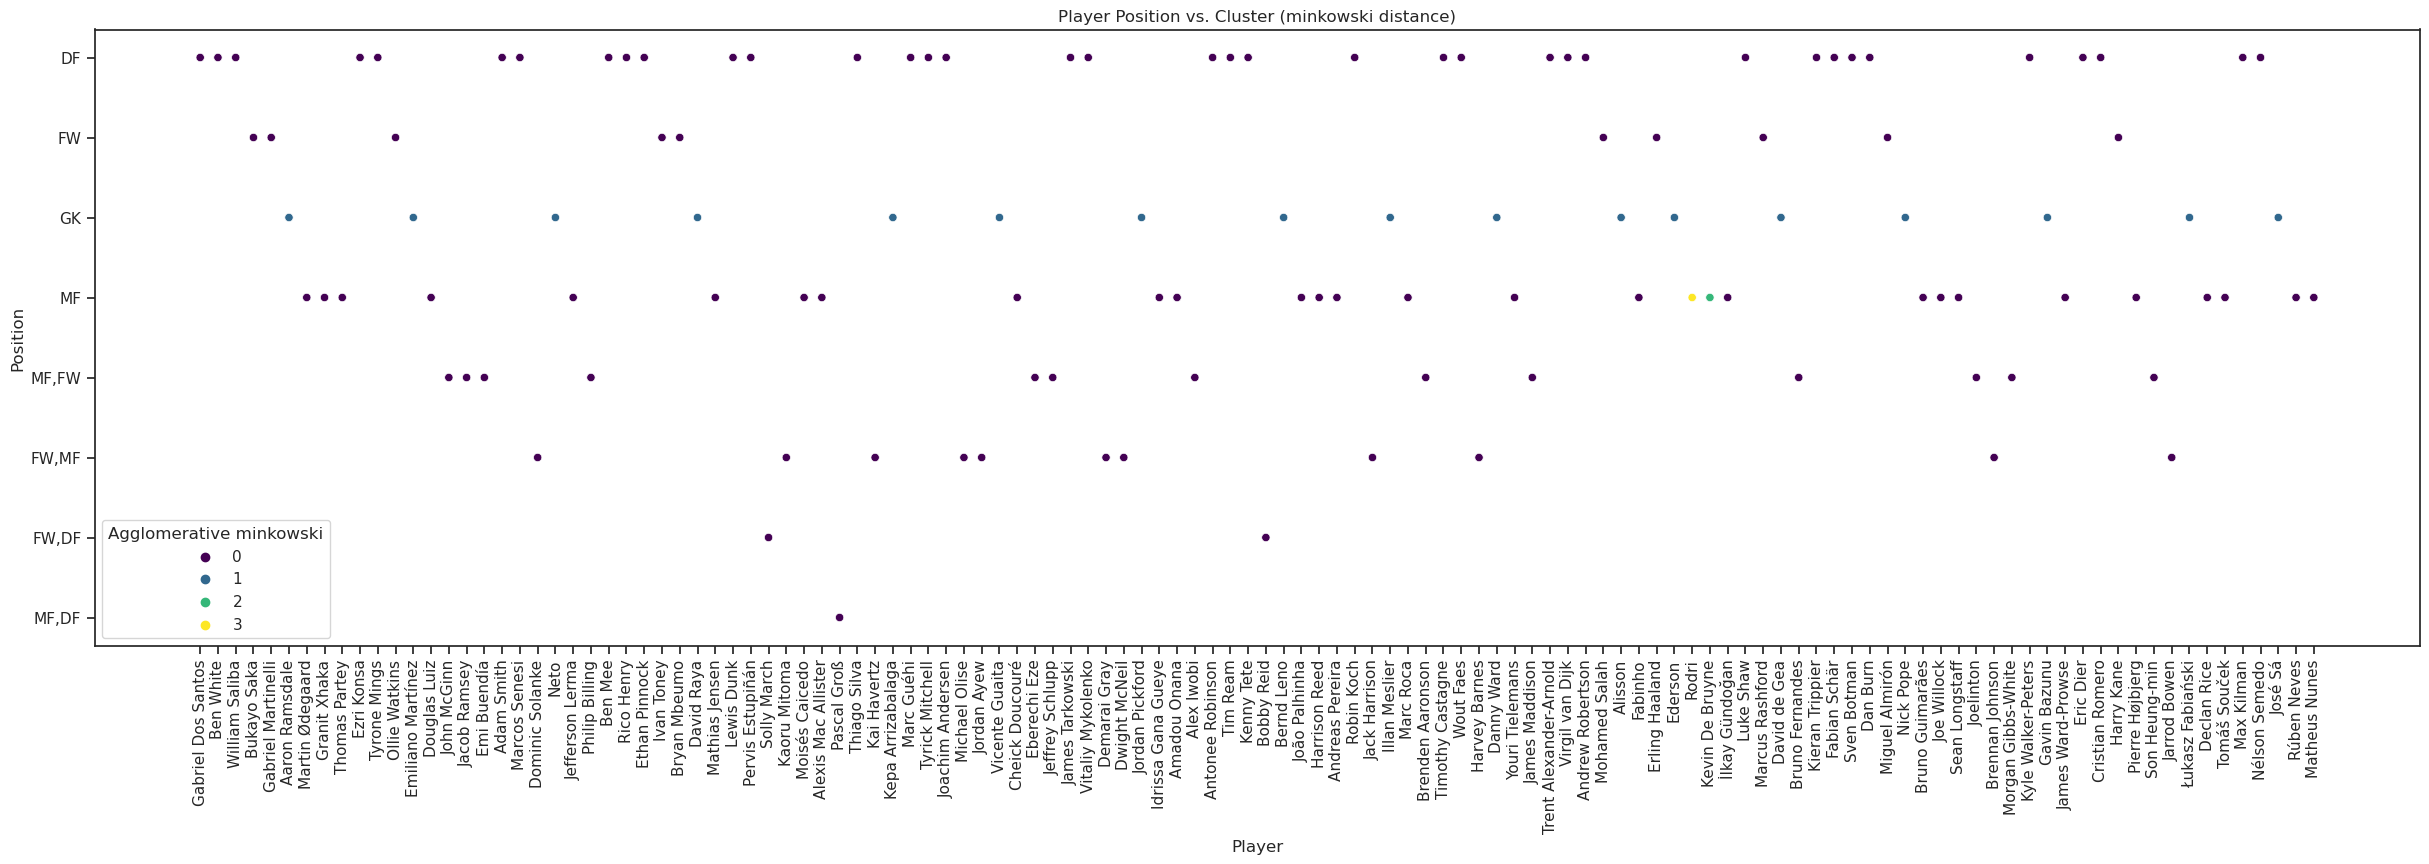

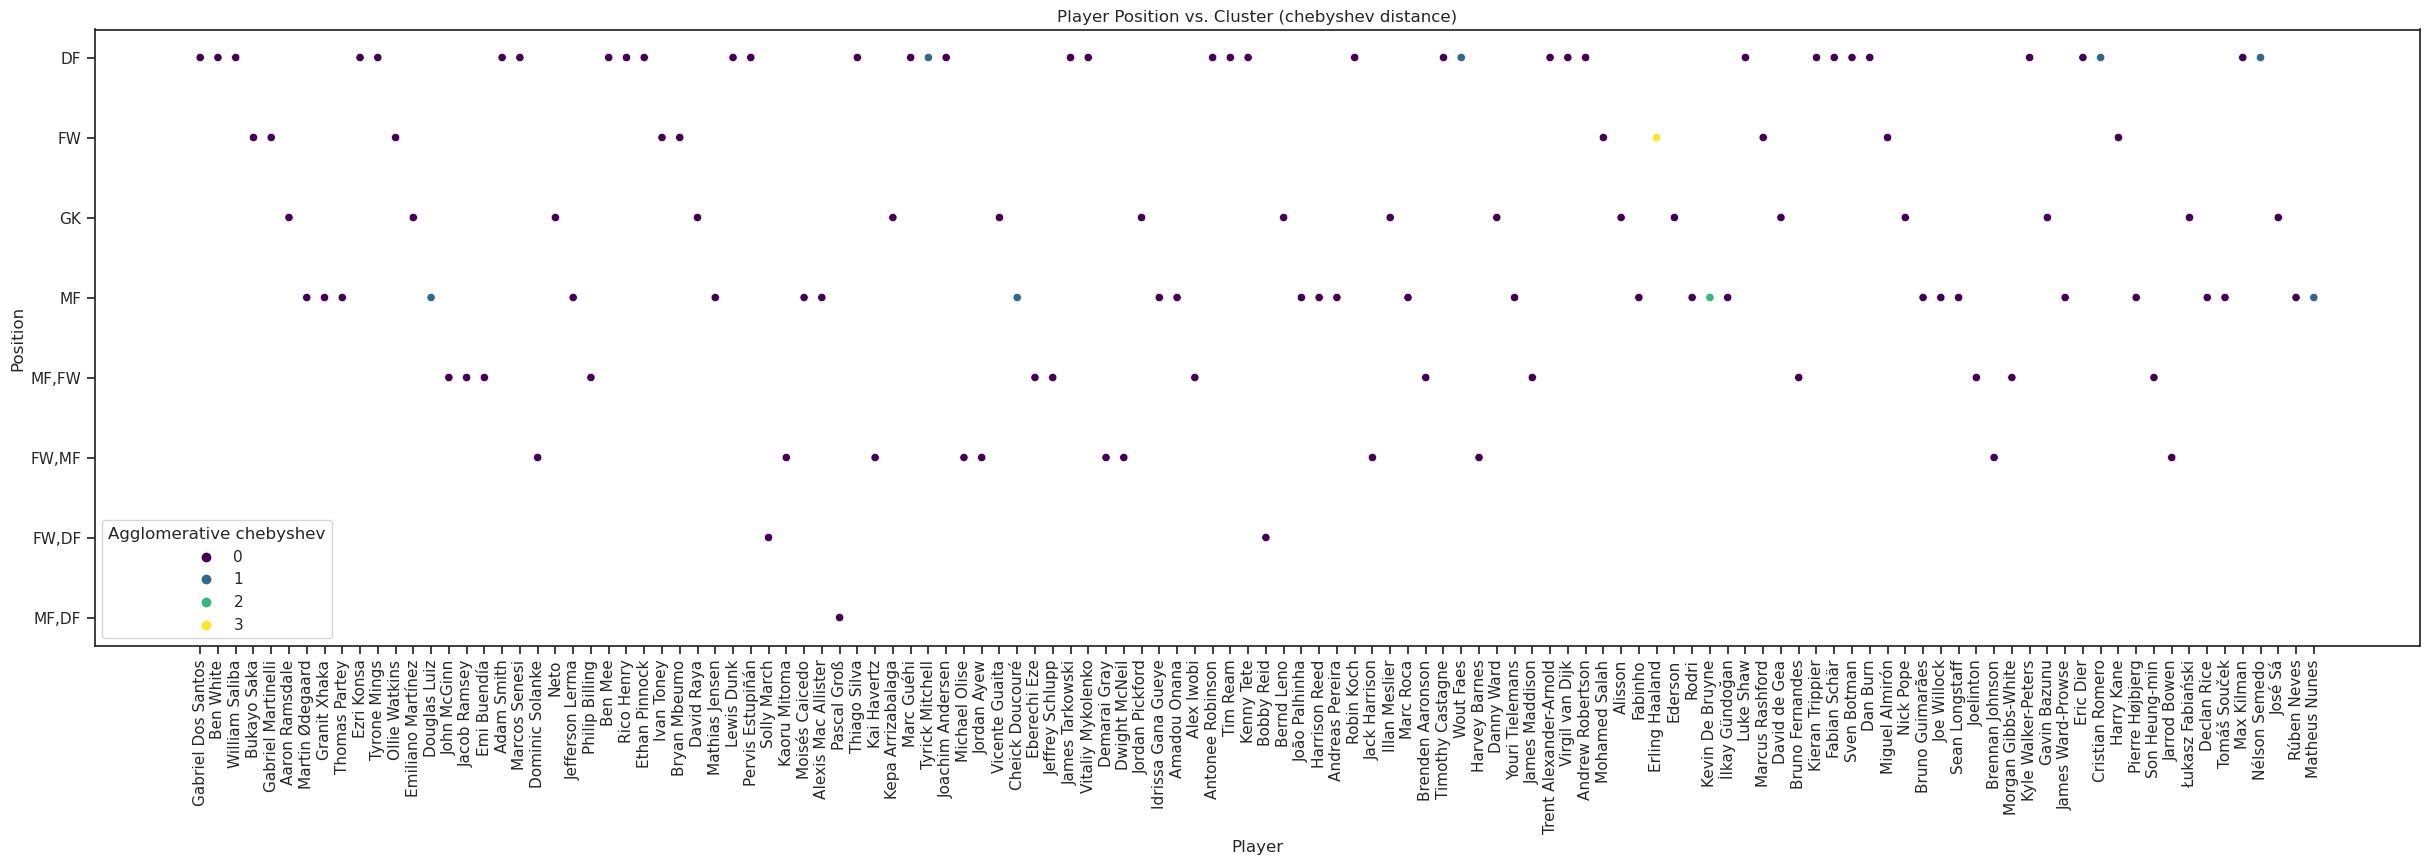

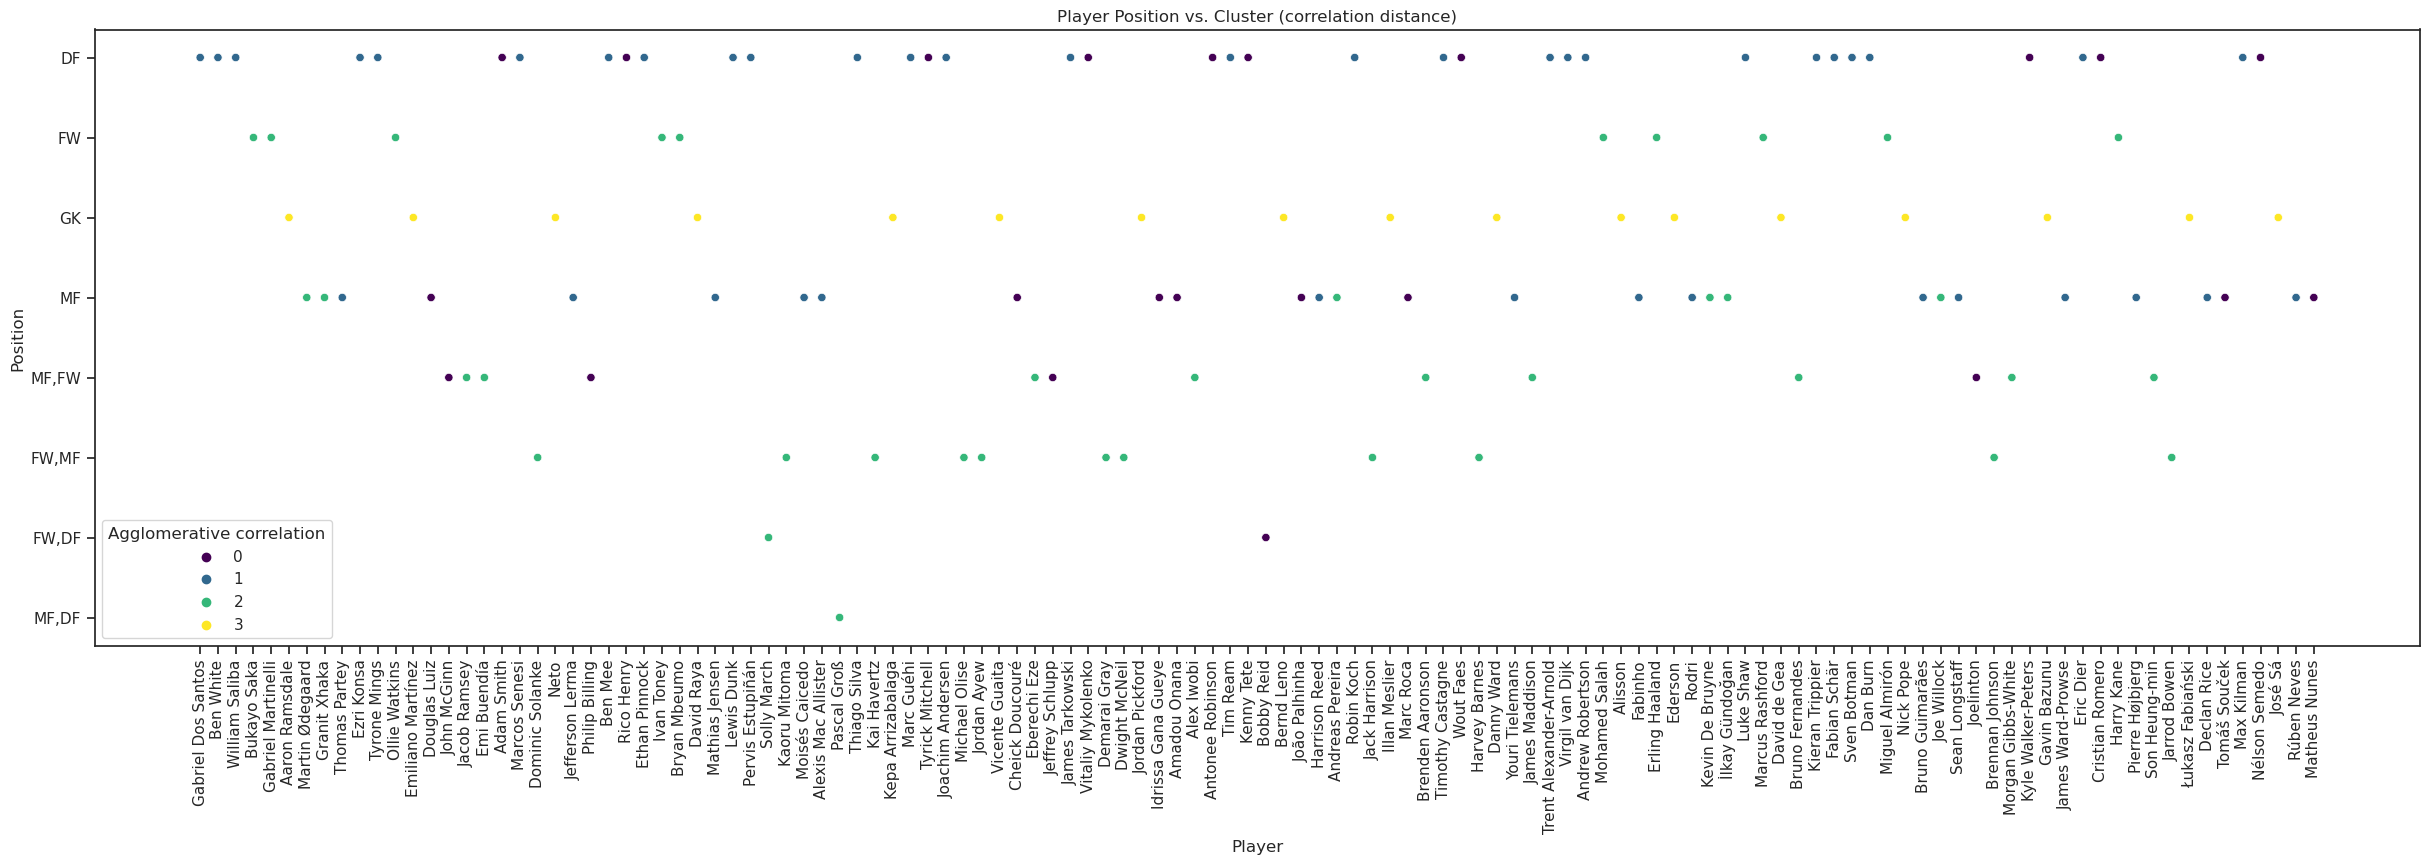

In [212]:
# Iterate over distance measures
for measure in distance_measures:
    # Create the plot
    plt.figure(figsize=(30, 8))  # Increase the figure size for wider plots
    sns.scatterplot(data=df_combined, x="Name", y='Position', hue=f'Agglomerative {measure}', palette='viridis', hue_order=[0, 1, 2, 3, 4])
    plt.xlabel('Player')
    plt.ylabel('Position')
    plt.title(f'Player Position vs. Cluster ({measure} distance)')
    plt.xticks(rotation=90)  # Orient the names vertically
    plt.show()

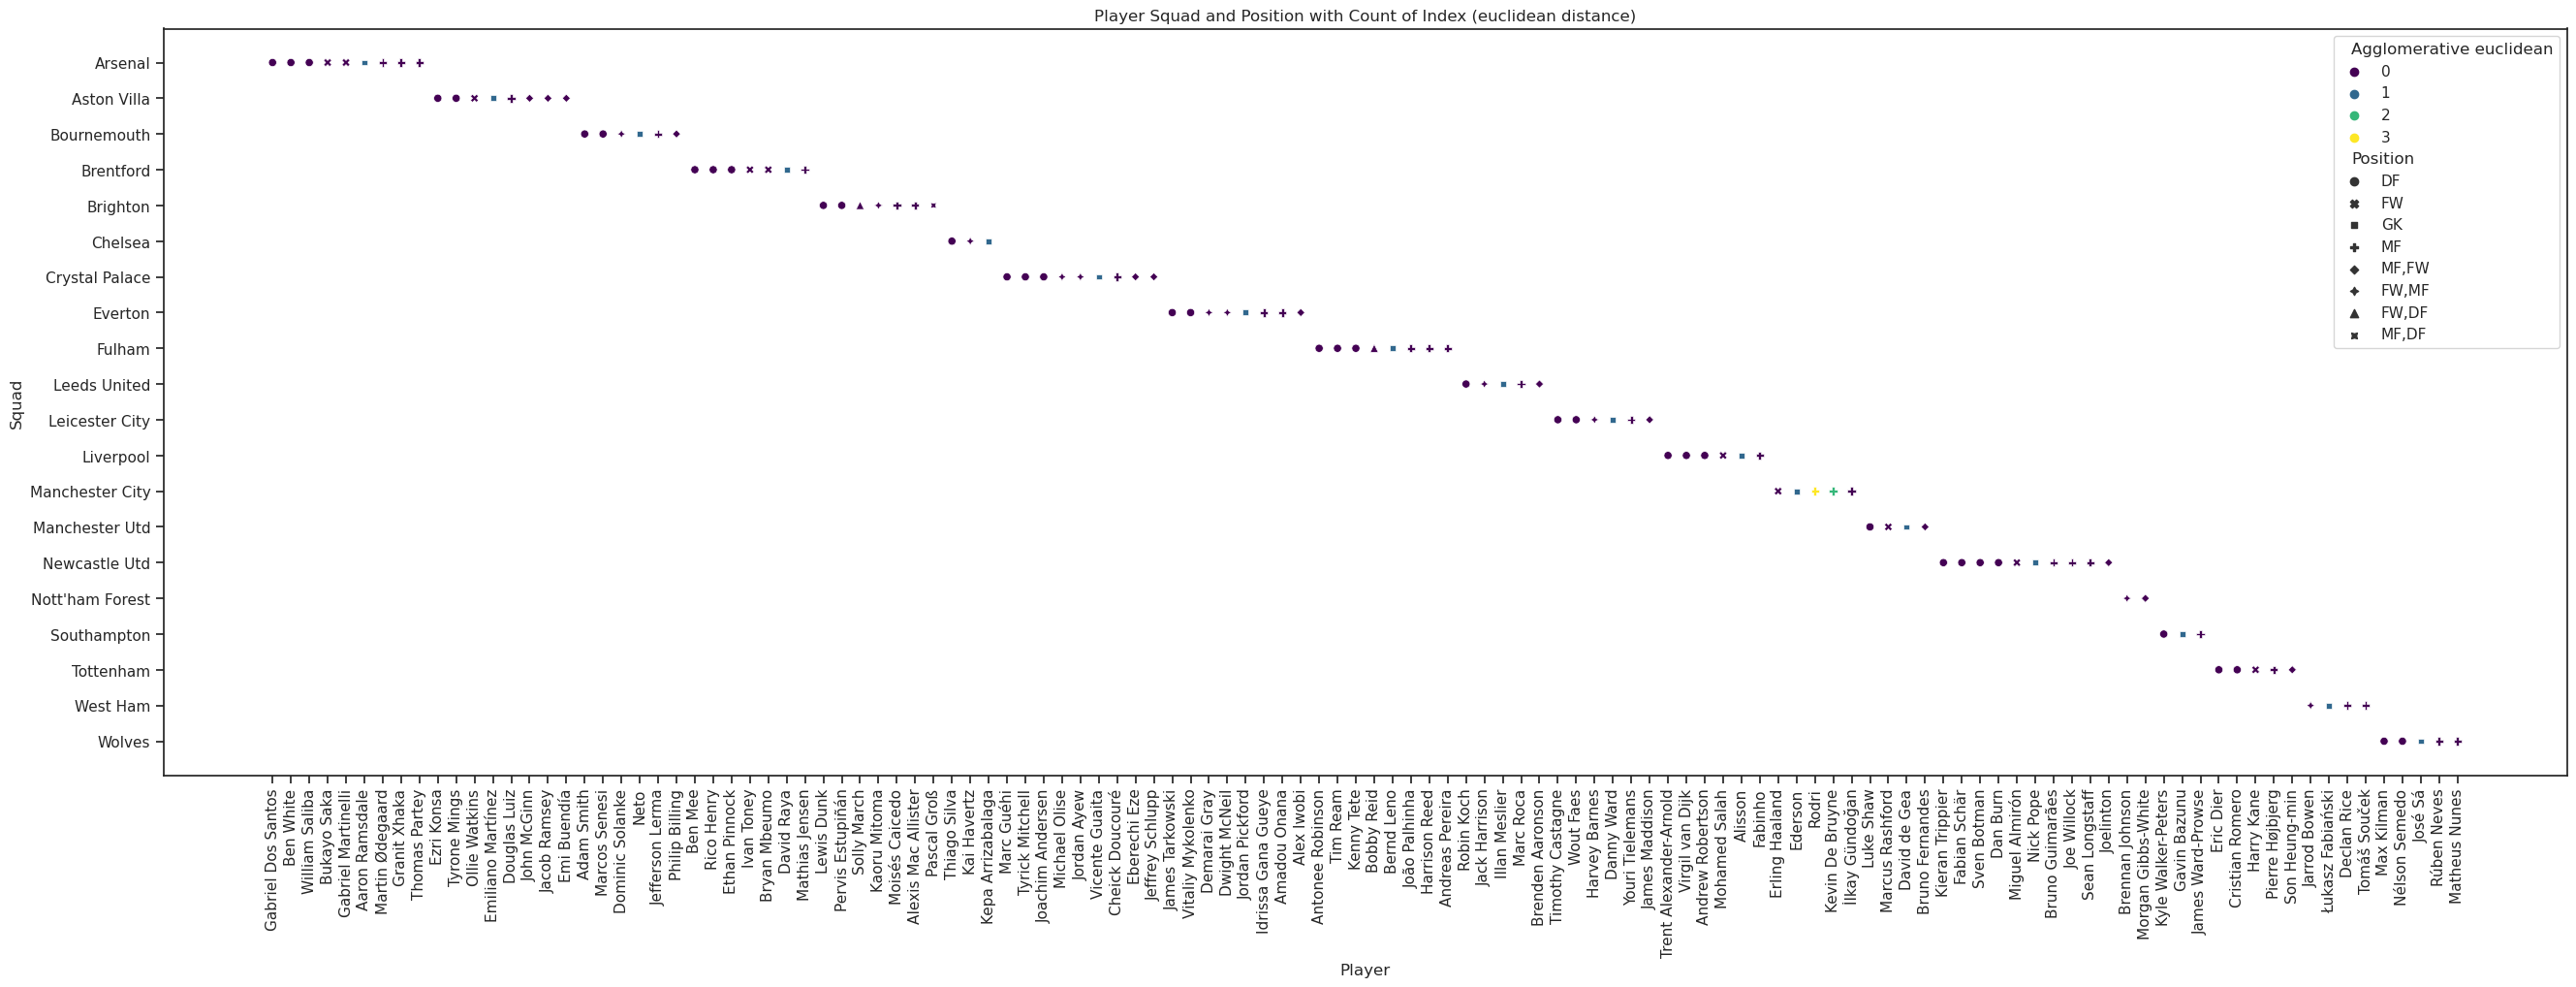

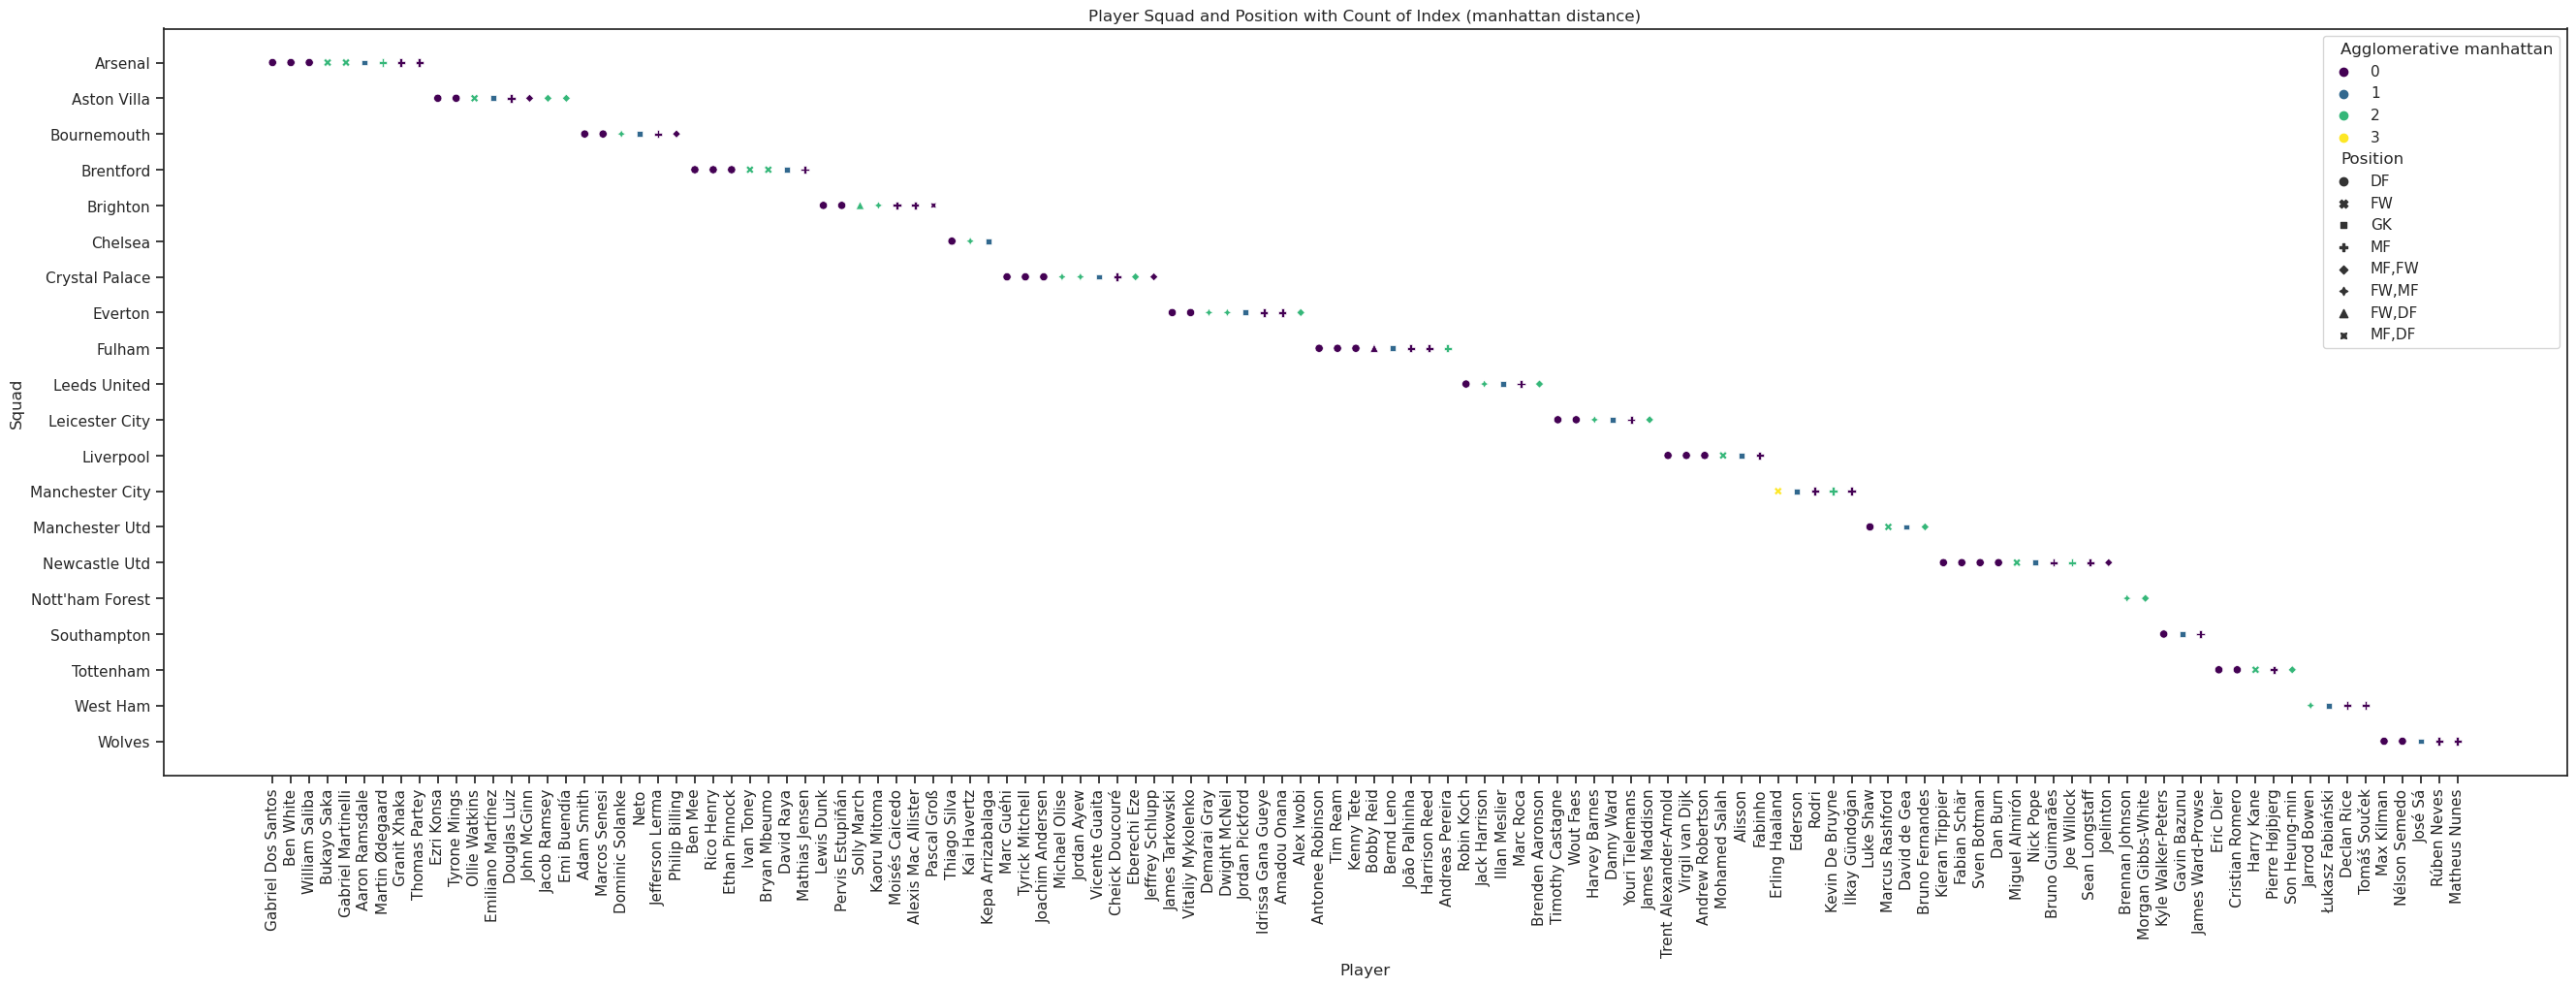

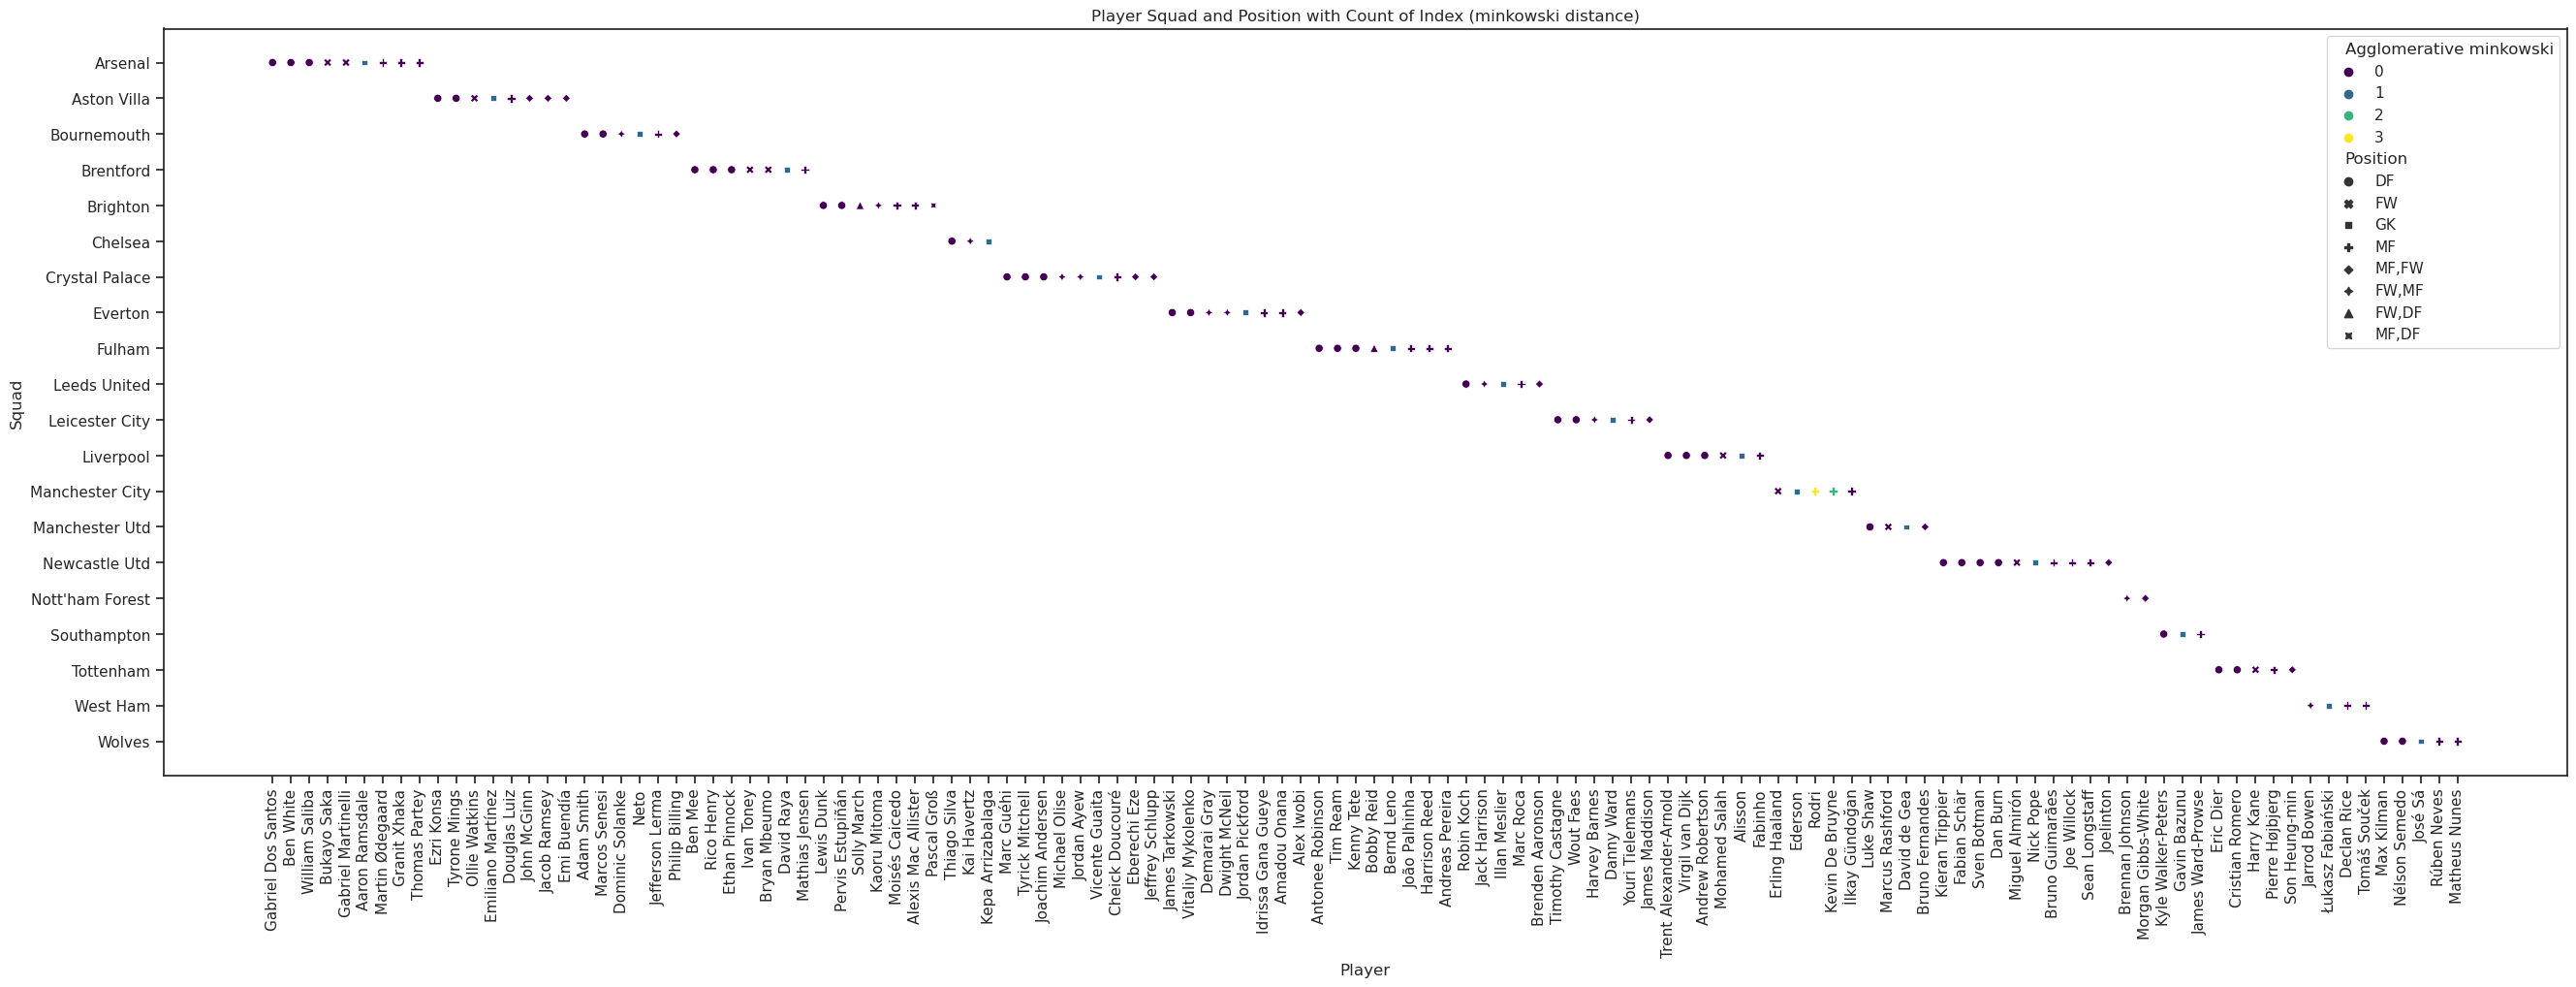

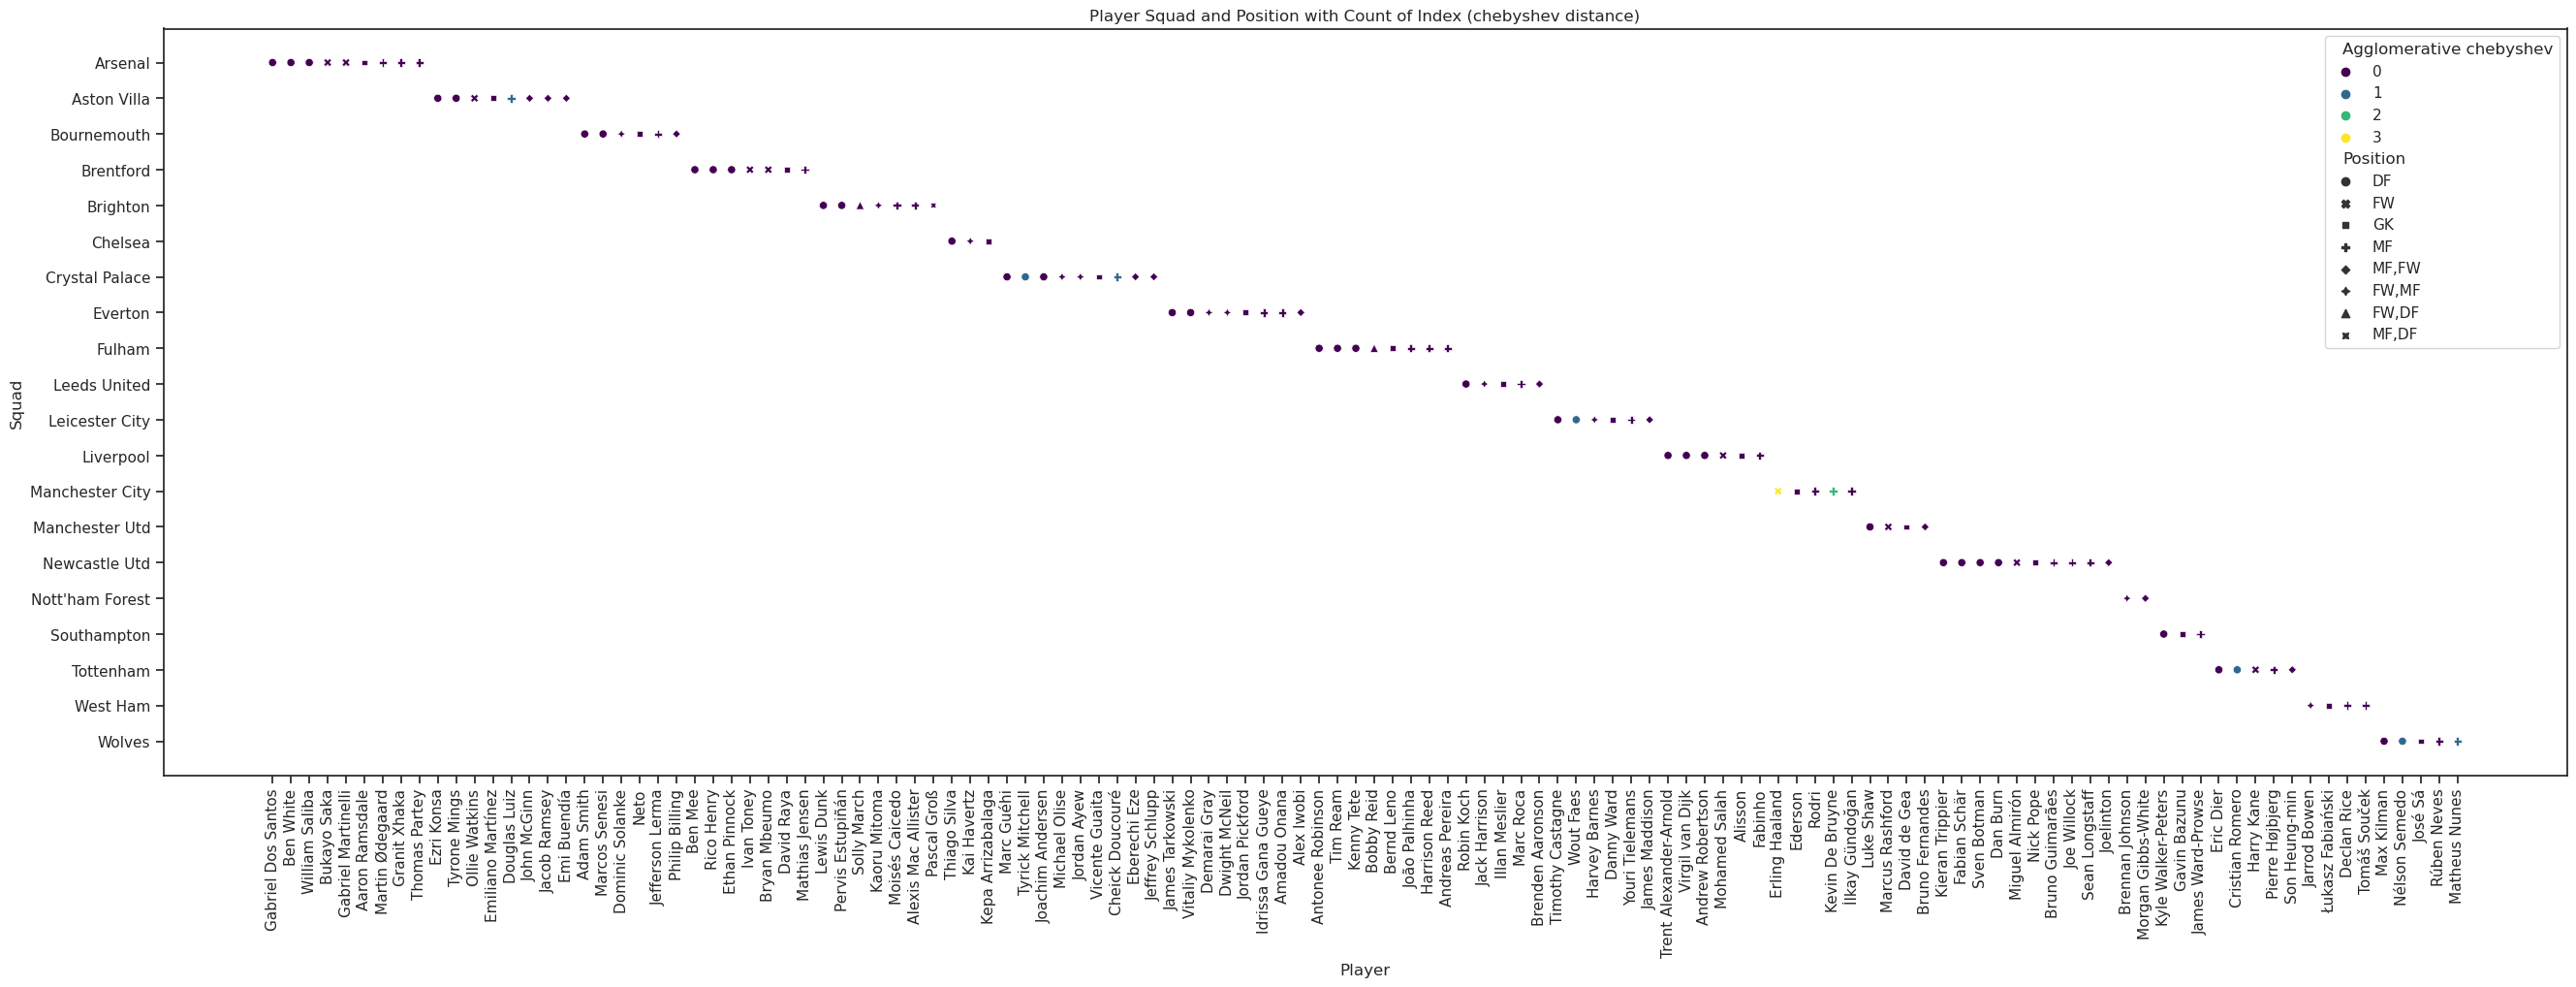

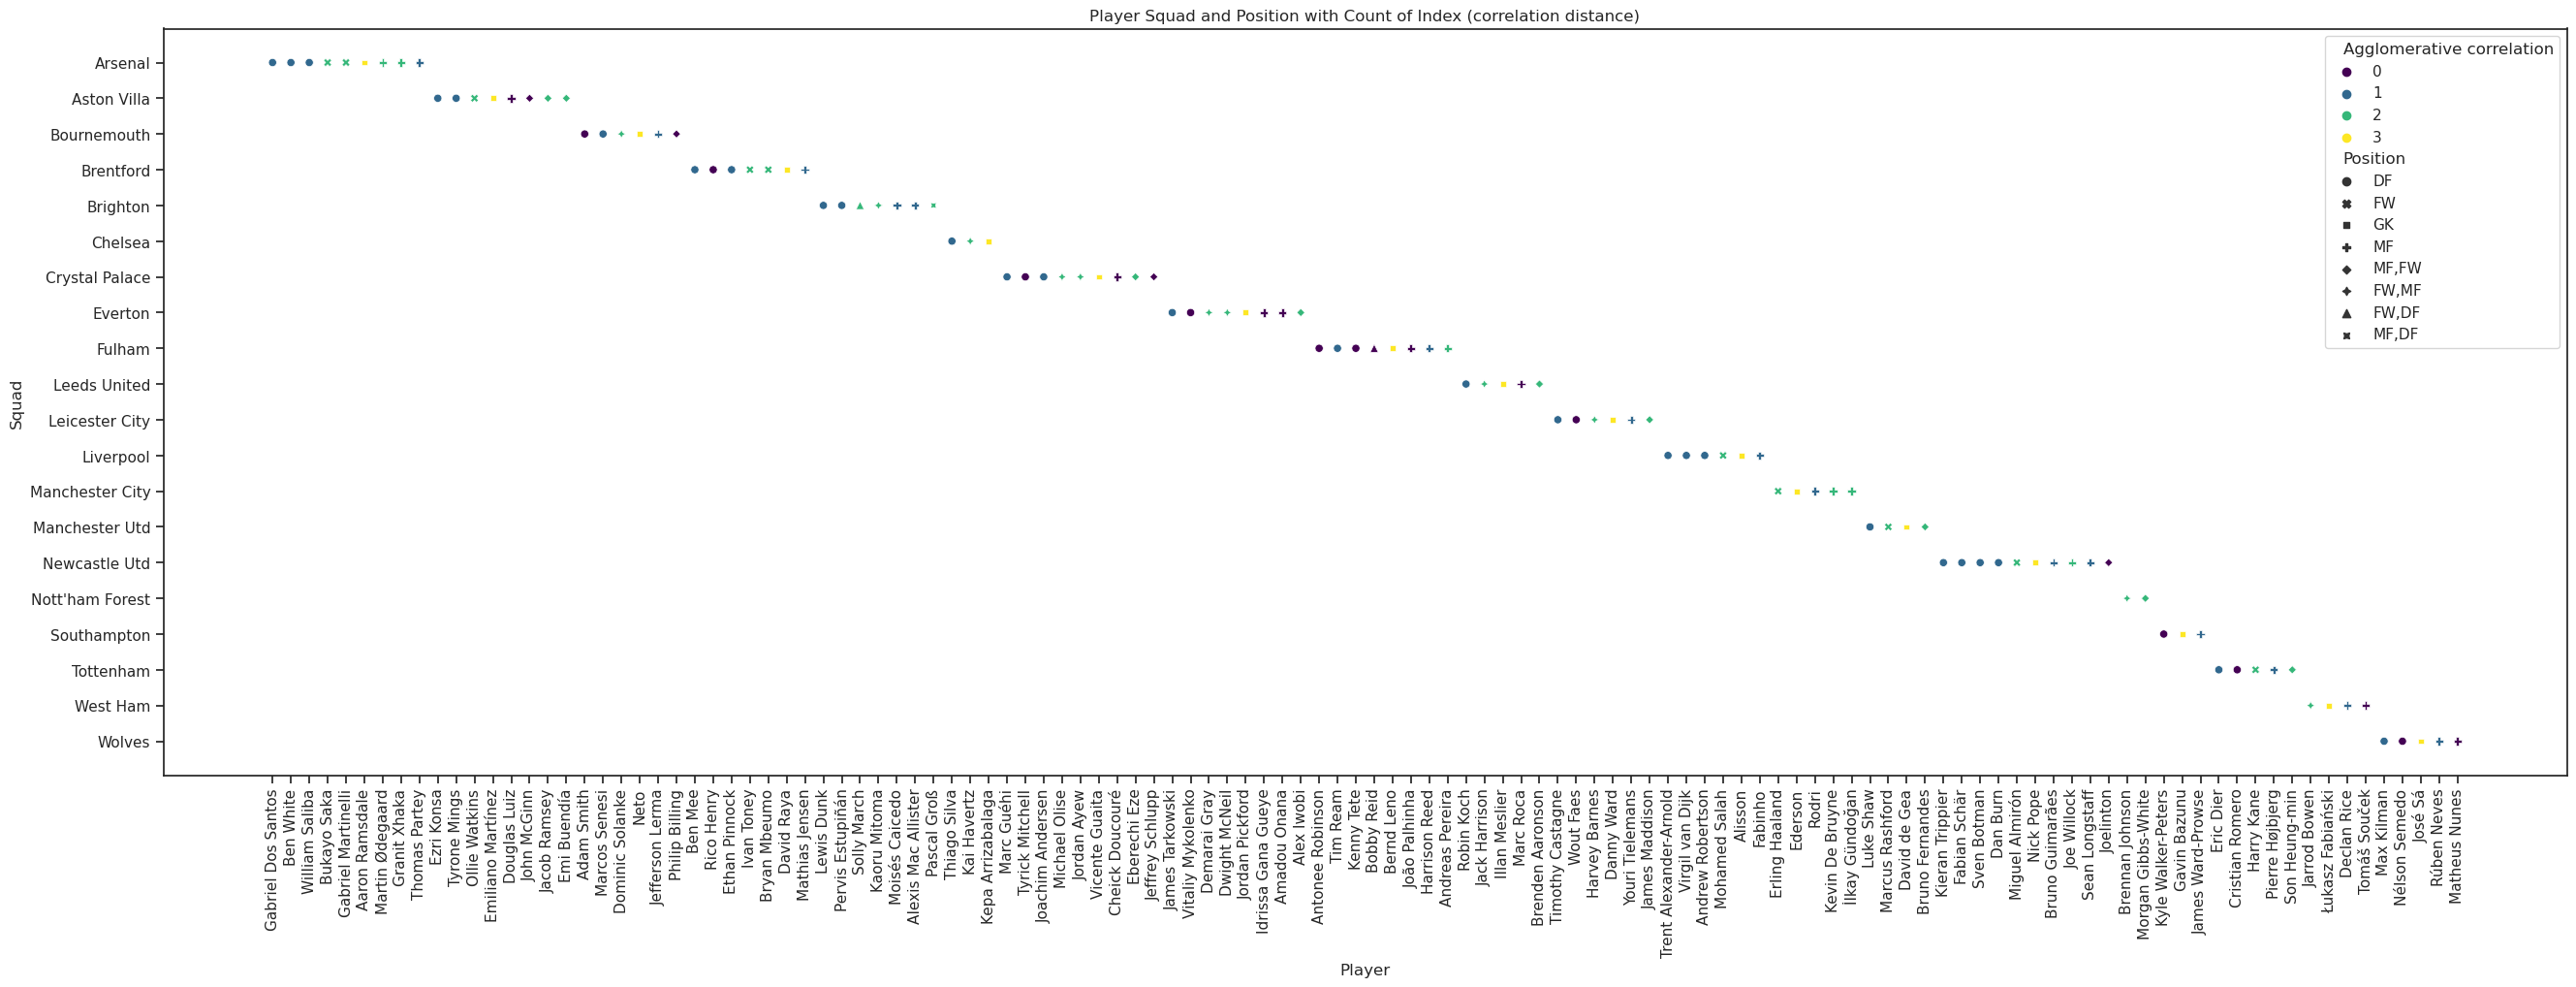

In [213]:
# Sort players by position
df_combined.sort_values(by=['Squad', 'Position'], inplace=True)
# Iterate over distance measures
for measure in distance_measures:
    # Create the plot
    plt.figure(figsize=(32, 10))  # Increase the figure size for wider plots
    sns.scatterplot(data=df_combined, x=df_combined.index, y='Squad', hue=f'Agglomerative {measure}', palette='viridis', style='Position')
    plt.xlabel('Player')
    plt.ylabel('Squad')
    plt.title(f'Player Squad and Position with Count of Index ({measure} distance)')
    plt.xticks(rotation=90)
    plt.show()

In [214]:
differences = pd.DataFrame()

cols = ['Total Passing Distance', 'Average Shot Distance', 'Progressive Carrying Distance', 'Clearances']
# Calculate the difference between clusters for K-means
for col in cols:
    for measure in distance_measures:
        differences[f'K-means Cluster Difference ({measure})'] = df_combined.groupby([f'K-means {measure}'])[[col]].transform(lambda x: x.max() - x.min())

# Calculate the difference within clusters for K-means
for col in cols:
    for measure in distance_measures:
        differences[f'K-means Cluster Within ({measure})'] = df_combined.groupby([f'K-means {measure}'])[[col]].transform(lambda x: x.std())


# Calculate the difference between clusters for Agglomerative
for col in cols:
    for measure in distance_measures:
        differences[f'Agglomerative Cluster Difference ({measure})'] = df_combined.groupby([f'Agglomerative {measure}'])[[col]].transform(lambda x: x.max() - x.min())

# Calculate the difference within clusters for Agglomerative
for col in cols:
    for measure in distance_measures:
        differences[f'Agglomerative Cluster Within ({measure})'] = df_combined.groupby([f'Agglomerative {measure}'])[[col]].transform(lambda x: x.std())

# View the updated dataframe
differences.head()


K-means Cluster Difference (euclidean)  \
Name                                                         
Gabriel Dos Santos                                0.070405   
Ben White                                         0.035108   
William Saliba                                    0.070405   
Bukayo Saka                                       0.014868   
Gabriel Martinelli                                0.014868   

                    K-means Cluster Difference (manhattan)  \
Name                                                         
Gabriel Dos Santos                                0.054622   
Ben White                                         0.035108   
William Saliba                                    0.054622   
Bukayo Saka                                       0.015197   
Gabriel Martinelli                                0.015197   

                    K-means Cluster Difference (minkowski)  \
Name                                                         
Gabriel Dos Santos                                0.070405   
Ben White                                         0.035108   
William Saliba                                    0.070405   
Bukayo Saka                                       0.014868   
Gabriel Martinelli                                0.014868   

                    K-means Cluster Difference (chebyshev)  \
Name                                                         
Gabriel Dos Santos                                0.076165   
Ben White                                         0.076165   
William Saliba                                    0.076165   
Bukayo Saka                                       0.041931   
Gabriel Martinelli                                0.017545   

                    K-means Cluster Difference (correlation)  \
Name                                                           
Gabriel Dos Santos                                  0.054622   
Ben White                                           0.033823   
William Saliba                                      0.054622   
Bukayo Saka                                         0.024726   
Gabriel Martinelli                                  0.024726   

                    K-means Cluster Within (euclidean)  \
Name                                                     
Gabriel Dos Santos                            0.016771   
Ben White                                     0.009390   
William Saliba                                0.016771   
Bukayo Saka                                   0.004153   
Gabriel Martinelli                            0.004153   

                    K-means Cluster Within (manhattan)  \
Name                                                     
Gabriel Dos Santos                            0.012204   
Ben White                                     0.008726   
William Saliba                                0.012204   
Bukayo Saka                                   0.004317   
Gabriel Martinelli                            0.004317   

                    K-means Cluster Within (minkowski)  \
Name                                                     
Gabriel Dos Santos                            0.016771   
Ben White                                     0.009390   
William Saliba                                0.016771   
Bukayo Saka                                   0.004153   
Gabriel Martinelli                            0.004153   

                    K-means Cluster Within (chebyshev)  \
Name                                                     
Gabriel Dos Santos                            0.016898   
Ben White                                     0.016898   
William Saliba                                0.016898   
Bukayo Saka                                   0.013774   
Gabriel Martinelli                            0.004828   

                    K-means Cluster Within (correlation)  \
Name                                                       
Gabriel Dos Santos                              0.012299   
Ben White              

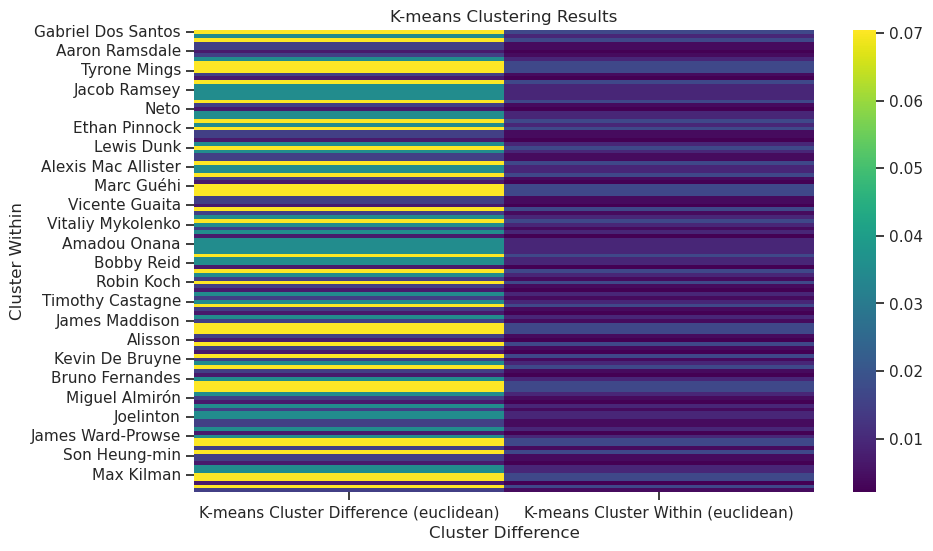

In [215]:
# Plotting the results as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=differences[['K-means Cluster Difference (euclidean)', 'K-means Cluster Within (euclidean)']], cmap='viridis')
plt.xlabel('Cluster Difference')
plt.ylabel('Cluster Within')
plt.title('K-means Clustering Results')
plt.show()


In [224]:
# calculate stats within clusters
averages = df_combined[['K-means euclidean', 'Total Passing Distance', 'Average Shot Distance', 'Progressive Carrying Distance', 'Clearances']].groupby(['K-means euclidean']).mean()
stds = df_combined[['K-means euclidean', 'Total Passing Distance', 'Average Shot Distance', 'Progressive Carrying Distance', 'Clearances']].groupby(['K-means euclidean']).std()
diffs = df_combined[['K-means euclidean', 'Total Passing Distance', 'Average Shot Distance', 'Progressive Carrying Distance', 'Clearances']].groupby(['K-means euclidean']).max() - df_combined[['K-means euclidean', 'Total Passing Distance', 'Average Shot Distance', 'Progressive Carrying Distance', 'Clearances']].groupby(['K-means euclidean']).min()

# calculate stats between clusters for each cluster
averages = 


print(stds)

                   Total Passing Distance  Average Shot Distance  \
K-means euclidean                                                  
0                                1.871400               0.001681   
1                                1.348630               0.000932   
2                                2.911707               0.002074   
3                                1.767153               0.001342   

                   Progressive Carrying Distance  Clearances  
K-means euclidean                                             
0                                       0.297790    0.009390  
1                                       0.144053    0.002076  
2                                       0.405007    0.016771  
3                                       0.327787    0.004153  
